## Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) #Mount google drive to load training and testing data


# This where all the Packages are cached instead or reinstalling them every new runtime
PACKAGES_DIR = '/content/drive/My Drive/Bachelor/pip_cache'
FINANCE_DIR = '/content/drive/MyDrive/Freelance/finance/'


Mounted at /content/drive


In [ ]:
!pip install odfpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
# visualization library
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Random Seed
RANDOM_SEED=42
RANDOM_STATE=42

# Set Seaborn style and set background color to white
sns.set_style('whitegrid')
rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'white'


# Set Matplotlib defaults
plt.style.use('ggplot')
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
# Set the background color of the plots to white
rcParams['figure.facecolor'] = 'white'

# Disable grid lines in Seaborn
sns.despine(left=True, right=True, top=True, bottom=True)



<Figure size 1400x600 with 0 Axes>

In [ ]:
def timeplot(df,series,label,title,name,percentage=True):
    df.index = df.index.astype(int)
  # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the data with line style, color, and marker
    ax.plot(df.index, series, linestyle='-', color='orange', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgecolor='orange', markeredgewidth=2)
        # Add grid lines
    #ax.grid(True)

    # Set title and axis labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(label, fontsize=12)

    # Set ticks font size
    ax.tick_params(labelsize=10)

    # Set legend
    ax.legend([label], loc='upper right', fontsize=10)
    # Set background color to white
    ax.set_facecolor('white')
   # ax.grid(True, color='gray', linestyle='-', linewidth=0.5)


    # Set figure size
    fig.set_size_inches(8, 6)
    # Set x-axis ticks to display all years
    ax.set_xticks(df.index)

    if percentage:
    # Add percentage sign (%) to y-axis labels
      plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])
    #     # Set x-axis tick locations and labels
    # #plt.xticks(df.index, rotation=45, ha='right')

    plt.savefig(FINANCE_DIR+f"{name.title()}/figures/{title}",format='png')
    plt.show()

In [ ]:
def multi_timeplot(df, label, title, name, value_vars,percentage=True): 
    df=df.copy()
    df.index = df.index.astype(int)
    fig, ax = plt.subplots()

    for value in value_vars:
          ax.plot(df.index, df[value], label = value, linestyle='-', linewidth=2, marker='o', markersize=6, markerfacecolor='white', markeredgewidth=2)

    
    # Set background color to white
    ax.set_facecolor('white')
    # Set title and axis labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(label, fontsize=12)
    ax.legend()

    # Set ticks font size
    ax.tick_params(labelsize=10)
    # Set figure size
    fig.set_size_inches(8, 6)
    # Set x-axis ticks to display all years
    ax.set_xticks(df.index)
    plt.title(title)
    plt.legend(title='Financial Statement Items')
    if percentage:
    # Add percentage sign (%) to y-axis labels
      plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])
    plt.savefig(FINANCE_DIR+f"{name.title()}/figures/{title}", format='png')
    plt.show()


## Profitability Ratios

In [ ]:
import pandas as pd

def calculate_profitability_ratios(df:pd.DataFrame,name:str)->pd.DataFrame:
    """
    Calculates Profitability Ratios from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Revenue': Total revenue
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Net Income': Net income

    Returns:
        pd.DataFrame: DataFrame containing the calculated profitability ratios:
            'Gross Profit Margin': Gross profit margin ratio
            'Operating Profit Margin': Operating profit margin ratio
            'Net Profit Margin': Net profit margin ratio
            'Return on Assets': Return on Assets (ROA)
            'Return on Equity': Return on Equity (ROE)
    """
    df = df.copy()
    # Calculate Gross Profit Margin
    df['Gross Profit Margin'] = ((df['Sales'] - df['Cost of Goods Sold']) / df['Sales']) * 100

    # Calculate Operating Profit Margin
    df['Operating Profit Margin'] = ((df['Sales'] - df['Cost of Goods Sold'] - df['EBIT']) / df['Sales']) * 100

    # Calculate Net Profit Margin
    df['Net Profit Margin'] = (df['Net Income (loss)'] / df['Sales']) * 100

    # Calculate Return on Equity (ROE)
    df['Return on Equity'] = (df['Net Income (loss)'] / df['Total Equity']) *100

    # Calculate Return on Assets (ROA)
    df['Return on Assets'] = (df['Net Income (loss)'] / df['Total Assets'])*100

    value_vars = ['Gross Profit Margin', 'Operating Profit Margin', 'Net Profit Margin','Return on Assets','Return on Equity']

    # Return the calculated profitability ratios as a new DataFrame
    profitability_ratios_df = df[value_vars]
    profitability_ratios_df = profitability_ratios_df.round().astype(int)


    name = name.title()
    multi_timeplot(profitability_ratios_df,'Percentages',name+' Profitability Ratios',name,value_vars)

    profitability_ratios_df=profitability_ratios_df.T
    profitability_ratios_df.index.name = 'Percentage/Year'

    for column in profitability_ratios_df.columns:
      profitability_ratios_df[column] = profitability_ratios_df[column].map("{:}%".format)
    profitability_ratios_df.to_excel(FINANCE_DIR+f'{name.title()}/profitability_ratios.ods', index=True, engine='odf')

    return profitability_ratios_df


## (Static) Liquidity Ratio

In [ ]:
import pandas as pd

def calculate_static_liquidity_ratios(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Calculates Static Liquidity Ratios from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Current Assets': Total current assets
            'Current Liabilities': Total current liabilities
            'Cash and Cash Equivalents': Cash and cash equivalents

    Returns:
        pd.DataFrame: DataFrame containing the calculated liquidity ratios:
            'Current Ratio': Current ratio
            'Quick Ratio': Quick ratio
            'Cash Ratio': Cash ratio
    """
    df = df.copy()
    # Calculate Current Ratio
    df['Current Ratio'] = (df['Current Assets'] / df['Current Liabilities'])*100

    # Calculate Quick Ratio
    df['Quick Ratio'] = ((df['Current Assets'] - df['Inventories']) / df['Current Liabilities'])*100

    # Calculate Cash Ratio
    df['Cash Ratio'] = (df['Cash'] / df['Current Liabilities'])*100
    # Plot line plot for efficiency ratios
    timeplot(df,df['Cash Ratio'] ,'Cash Ratio',name+' Cash Ratio',name)
    timeplot(df,df['Current Ratio'] ,'Current Ratio',name+' Current Ratio',name)
    timeplot(df,df['Quick Ratio'] ,'Quick Ratio',name+' Quick Ratio',name)


    value_vars = ['Current Ratio', 'Quick Ratio', 'Cash Ratio']
    # Return the calculated liquidity ratios as a new DataFrame
    liquidity_ratios_df = df[value_vars]
    liquidity_ratios_df = liquidity_ratios_df.round().astype(int)

    name = name.title()
    multi_timeplot(liquidity_ratios_df,'Percentages',name+' Static Liquidity Ratio',name,value_vars)

    
    liquidity_ratios_df = liquidity_ratios_df.T
    liquidity_ratios_df.index.name = 'Percentages/Year'

    for column in liquidity_ratios_df.columns:
      liquidity_ratios_df[column] = liquidity_ratios_df[column].map("{:}%".format)

    liquidity_ratios_df.to_excel(FINANCE_DIR+f'{name.title()}/static_liquidity_ratios.ods', index=True, engine='odf')

    return liquidity_ratios_df


## Efficiency ratios

In [ ]:
import pandas as pd

def calculate_efficiency_ratios(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Calculates Efficiency Ratios from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Revenue': Total revenue
            'Net Income': Net income
            'Total Assets': Total assets
            'Average Total Assets': Average total assets
            'Total Equity': Total equity
            'Average Total Equity': Average total equity
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Sales': Sales

    Returns:
        pd.DataFrame: DataFrame containing the calculated efficiency ratios:
            'Asset Turnover': Asset turnover ratio
            'Inventory Turnover': Inventory turnover ratio
            'Days Sales of Inventory': Days sales of inventory
            'Receivables Turnover': Receivables turnover ratio
            'Days Sales Outstanding': Days sales outstanding
            'Payables Turnover': Payables turnover ratio
            'Days Payable Outstanding': Days payable outstanding
            'Cash Conversion Cycle': Cash conversion cycle
    """
    df = df.copy()
    # Calculate Asset Turnover
    df['Asset Turnover'] = df['Sales'] / df['Total Assets']

    # Calculate Inventory Turnover
    df['Inventory Turnover'] = df['Cost of Goods Sold'] / df['Inventories']

    # Calculate Days Sales of Inventory
    df['Days Sales of Inventory'] = 365 / df['Inventory Turnover']

    # Calculate Receivables Turnover
    df['Receivables Turnover'] = df['Sales'] / df['Receivables']

    # Calculate Days Sales Outstanding
    df['Days Sales Outstanding'] = 365 / df['Receivables Turnover']

    # Calculate Payables Turnover
    df['Payables Turnover'] = df['Cost of Goods Sold'] / df['Payables']

    # Calculate Days Payable Outstanding
    df['Days Payable Outstanding'] = 365 / df['Payables Turnover']

    # Calculate Cash Conversion Cycle
    df['Cash Conversion Cycle'] = df['Days Sales of Inventory'] + df['Days Sales Outstanding'] - df['Days Payable Outstanding']

    value_vars = ['Asset Turnover', 'Inventory Turnover', 'Days Sales of Inventory', 
                                'Receivables Turnover', 'Days Sales Outstanding', 
                                'Payables Turnover', 'Days Payable Outstanding', 'Cash Conversion Cycle']
    # Return the calculated efficiency ratios as a new DataFrame
    efficiency_ratios_df = df[value_vars]
    efficiency_ratios_df = efficiency_ratios_df.applymap(lambda x: round(x, 2))

    name = name.title()
    multi_timeplot(efficiency_ratios_df,'Ratios',name+' Efficiency Ratio',name,value_vars)

    efficiency_ratios_df = efficiency_ratios_df.T
    efficiency_ratios_df.index.name = 'Ratio/Year'
    
    efficiency_ratios_df.to_excel(FINANCE_DIR+f'{name.title()}/efficiency_ratios.ods', index=True, engine='odf')

    return efficiency_ratios_df


## Common Size

In [ ]:
import pandas as pd

def calculate_common_size(df:pd.DataFrame,name:str)->pd.DataFrame:
    """
    Calculates common size from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Revenue': Total revenue
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Net Income': Net income
            'EBIT': Earnings before interest and taxes
            'Interest': Interest expenses
        name (str): Name of the company for which the ratios are being calculated.

    Returns:
        pd.DataFrame: DataFrame containing the calculated profitability ratios:
        'Sales': Sales as a percentage of total Sales
        'Cost of Goods Sold': Cost of goods sold as a percentage of total Sales
        'EBIT': Earnings before interest and taxes as a percentage of total Sales
        'Interest': Interest expenses as a percentage of total Sales
        'Net Income (loss)': Net income (loss) as a percentage of total Sales   
    """
    df = df.copy()

    df['Cost of Goods Sold'] = (df['Cost of Goods Sold'] / df['Sales']) * 100
    df['EBIT'] = (df['EBIT'] / df['Sales']) * 100
    df['Interest income (loss)'] = (df['Interest income (loss)'] / df['Sales']) * 100
    df['Net Income (loss)'] = (df['Net Income (loss)'] / df['Sales']) * 100
    df['Sales'] = (df['Sales'] / df['Sales']) * 100



    value_vars = ['Sales', 'Cost of Goods Sold', 'EBIT','Interest income (loss)','Net Income (loss)']

    # Return the calculated common size  as a new DataFrame
    common_size_df = df[value_vars]
    common_size_df = common_size_df.round().astype(int)
    name = name.title()
    multi_timeplot(common_size_df,'Percentages',name+' Common Size analysis',name,value_vars)

    common_size_df=common_size_df.T
    common_size_df.index.name = 'Percentage/Year'

    for column in common_size_df.columns:
      common_size_df[column] = common_size_df[column].map("{:}%".format)

    common_size_df.to_excel(FINANCE_DIR+f'{name.title()}/common_size.ods', index=True, engine='odf')

    return common_size_df


## common year

> taking base year the earliest year

In [ ]:
import pandas as pd

def calculate_common_year(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Calculates Common Year Balance Sheet Ratios from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Sales': Total revenue
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Net Income': Net income
            'EBIT': Earnings before interest and taxes
            'Interest': Interest expenses
        name (str): Name of the company for which the ratios are being calculated.

    Returns:
        pd.DataFrame: DataFrame containing the calculated common size balance sheet ratios:
            'Sales': Sales as a percentage of the base year (earliest year) sales
            'Cost of Goods Sold': Cost of goods sold as a percentage of the base year sales
            'EBIT': Earnings before interest and taxes as a percentage of the base year sales
            'Interest': Interest expenses as a percentage of the base year sales
            'Net Income (loss)': Net income (loss) as a percentage of the base year sales
    """
    df = df.copy()

    # Find the base year (earliest year) in the DataFrame
    base_year = df.index.min()

    # Convert relevant columns to numeric data type
    numeric_cols = ['Sales', 'Cost of Goods Sold', 'EBIT', 'Interest income (loss)', 'Net Income (loss)']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Calculate Common Size Balance Sheet Ratios relative to the base year
    base_year_sales = df.loc[base_year, 'Sales']
    base_year_cosg = df.loc[base_year, 'Cost of Goods Sold']
    base_year_ebit = df.loc[base_year, 'EBIT']
    base_year_interest = df.loc[base_year, 'Interest income (loss)']
    base_year_net_income = df.loc[base_year, 'Net Income (loss)']

    # 
    df['Sales'] = (df['Sales'] / base_year_sales) * 100
    df['Cost of Goods Sold'] = (df['Cost of Goods Sold'] / base_year_cosg) * 100
    df['EBIT'] = (df['EBIT'] / base_year_ebit) * 100
    df['Interest income (loss)'] = (df['Interest income (loss)'] / base_year_interest) * 100
    df['Net Income (loss)'] = (df['Net Income (loss)'] / base_year_net_income) * 100

    value_vars = ['Sales', 'Cost of Goods Sold', 'EBIT', 'Interest income (loss)', 'Net Income (loss)']

    # Return the calculated common size balance sheet ratios as a new DataFrame
    common_year_ratios_df = df[value_vars]
    common_year_ratios_df = common_year_ratios_df.round().astype(int)

    name = name.title()
    multi_timeplot(common_year_ratios_df,'Percentages',name+' Common Year analysis',name,value_vars)
    
    common_year_ratios_df = common_year_ratios_df.T
    common_year_ratios_df.index.name = 'Percentage/Year'


    for column in common_year_ratios_df.columns:
      common_year_ratios_df[column] = common_year_ratios_df[column].map("{:}%".format)

    common_year_ratios_df.to_excel(FINANCE_DIR+f'{name.title()}/common_year_ratios.ods', index=True, engine='odf')

    return common_year_ratios_df


## Operating Cash flow ratios

In [ ]:
import pandas as pd

def calculate_operating_cashflow(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Calculates Operating Cash flow from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Sales': Total revenue
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Net Income': Net income
            'EBIT': Earnings before interest and taxes
            'Interest': Interest expenses
        name (str): Name of the company for which the ratios are being calculated.

    Returns:
        pd.DataFrame: DataFrame containing the calculated cash flow  ratios:
     """
    df = df.copy()

    # Calculate Operating Cash Flow to Total Assets ratio
    df['Operating Cash Flow to Total Assets'] = (df['Operating Cash Flow'] / df['Total Assets']) * 100

    # Calculate Operating Cash Flow to Sales ratio
    df['Operating Cash Flow to Sales'] = (df['Operating Cash Flow'] / df['Sales']) *100
    value_vars = [ 'Operating Cash Flow to Total Assets', 'Operating Cash Flow to Sales']



    # Return the calculated common size balance sheet ratios as a new DataFrame
    cashflow_df= df[value_vars]
    cashflow_df = cashflow_df.round().astype(int)

    name = name.title()
    multi_timeplot(cashflow_df,'Percentages',name+' Cash Flow Ratios',name,value_vars)
    cashflow_df = cashflow_df.T
    cashflow_df.index.name = 'Percentage/Year'

    for column in cashflow_df.columns:
      cashflow_df[column] = cashflow_df[column].map("{:}%".format)


    cashflow_df.to_excel(FINANCE_DIR+f'{name.title()}/operating_cash_flow.ods', index=True, engine='odf')

    return cashflow_df


##  Operational Profitability Ratios

In [ ]:
import pandas as pd

def calculate_operating_income_profitability(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Calculates Operating Income from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Sales': Total revenue
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Net Income': Net income
            'EBIT': Earnings before interest and taxes
            'Interest': Interest expenses
        name (str): Name of the company for which the ratios are being calculated.

    Returns:
        pd.DataFrame: DataFrame containing the calculated Operating Income  ratios:
     """
    df = df.copy()

    # Calculate Operating Income to Total Assets ratio
    df['Operating Income to Total Assets'] = (df['EBIT'] / df['Total Assets']) *100 

    # Calculate Operating Income to Sales ratio
    df['Operating Income to Sales'] = (df['EBIT'] / df['Sales']) * 100
    
    # Calculate Operating Income to  Total Equity
    df['Operating Income to Total Equity'] = (df['EBIT'] / df['Total Equity']) * 100

    timeplot(df,df['Operating Income to Total Assets'] ,'Operating Income to Total Assets',name+' Operating Income to Total Assets',name)
    timeplot(df,df['Operating Income to Sales'] ,'Operating Income to Sales',name+' Operating Income to Sales',name)
    timeplot(df,df['Operating Income to Total Equity'] ,'Operating Income to Total Equity',name+' Operating Income to Total Equity',name)

    value_vars = [ 'Operating Income to Total Equity','Operating Income to Total Assets', 'Operating Income to Sales']
    # Return the calculated common size balance sheet ratios as a new DataFrame
    operating_income_df= df[value_vars]
    operating_income_df = operating_income_df.round().astype(int)
    
    name = name.title()
    multi_timeplot(operating_income_df,'Percentages',name+' Operating Income Profitability',name,value_vars)

    operating_income_df = operating_income_df.T
    operating_income_df.index.name = 'Percentage/Year'


    for column in operating_income_df.columns:
      operating_income_df[column] = operating_income_df[column].map("{:}%".format)

    operating_income_df.to_excel(FINANCE_DIR+f'{name.title()}/operating_income_profitability.ods', index=True, engine='odf')

    return operating_income_df


## Dynamic liquidity

In [ ]:
import pandas as pd

def calculate_dynamic_liquiduty(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Calculates dynamic liquidity from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Revenue': Total revenue
            'Net Income': Net income
            'Total Assets': Total assets
            'Average Total Assets': Average total assets
            'Total Equity': Total equity
            'Average Total Equity': Average total equity
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Sales': Sales

    Returns:
        pd.DataFrame: DataFrame containing the calculated efficiency ratios:
            'Asset Cycle': Asset  cycle (1 / Asset)
            'Inventory Cycle': Inventory cycle (1 / Inventory)
            'Days Sales of Inventory Cycle': Days sales of inventory cycle (Inventory Cycle * 365)
            'Receivables Cycle': Receivables cycle (1 / Receivables)
            'Days Sales Outstanding Cycle': Days sales outstanding cycle (Receivables Cycle * 365)
            'Payables Cycle': Payables cycle (1 / Payables)
            'Days Payable Outstanding Cycle': Days payable outstanding cycle (Payables Cycle * 365)
            'Cash Conversion Cycle': Cash conversion cycle (Days Sales of Inventory Cycle + Days Sales Outstanding Cycle - Days Payable Outstanding Cycle)
    """
    df = df.copy()
    # Calculate Asset cycle
    df['Asset Cycle'] = df['Total Assets'] / df['Sales'] 

    # Calculate Inventory cycle
    df['Inventory Cycle'] = df['Inventories'] / df['Cost of Goods Sold']

    # Calculate Days Sales of Inventory cycle
    df['Days Sales of Inventory Cycle'] = df['Inventory Cycle'] * 365

    # Calculate Receivables cycle
    df['Receivables Cycle'] =  df['Receivables'] / df['Sales']

    # Calculate Days Sales Outstanding cycle
    df['Days Sales Outstanding Cycle'] = df['Receivables Cycle'] * 365

    df["Operating Cycle"] = df["Inventory Cycle"] + df["Receivables Cycle"] 



    # Calculate Payables cycle
    df['Payables Cycle'] =  df['Payables']/df['Cost of Goods Sold'] 

    # Calculate Days Payable Outstanding cycle
    df['Days Payable Outstanding Cycle'] = df['Payables Cycle'] * 365

    # Calculate Cash Conversion Cycle
    df['Cash Conversion Cycle'] = df['Days Sales of Inventory Cycle'] + df['Days Sales Outstanding Cycle'] - df['Days Payable Outstanding Cycle']
    
    df['Net Trade Cycle'] = (df['Receivables'] - df['Payables'] )/ (df['Sales']/365)

    timeplot(df,df['Inventory Cycle'] ,'Inventory Cycle',name+' Inventory Cycle',name,percentage=False)
    timeplot(df,df['Receivables Cycle'] ,'Receivables Cycle',name+' Receivables Cycle',name,percentage=False)
    timeplot(df,df['Payables Cycle'] ,'Payables Cycle',name+' Payables Cycle',name,percentage=False)
    timeplot(df,df['Operating Cycle'] ,'Operating Cycle',name+' Operating Cycle',name,percentage=False)
    timeplot(df,df['Cash Conversion Cycle'] ,'Cash Conversion Cycle',name+' Cash Conversion Cycle',name,percentage=False)

    timeplot(df,df['Net Trade Cycle'] ,'Net Trade Cycle',name+' Net Trade Cycle',name,percentage=False)
    value_vars = ['Net Trade Cycle','Asset Cycle', 'Inventory Cycle', 'Days Sales of Inventory Cycle', 
                                'Receivables Cycle', 'Days Sales Outstanding Cycle', "Operating Cycle",
                                'Payables Cycle', 'Days Payable Outstanding Cycle', 'Cash Conversion Cycle']
                                
    # Return the calculated dynamic liquidty as a new DataFrame
    dynamic_liquidty_df = df[value_vars]
    dynamic_liquidty_df = dynamic_liquidty_df.applymap(lambda x: round(x, 2))
    
    name = name.title()
    multi_timeplot(dynamic_liquidty_df,'Ratios',name+' Dynamic Liquidty',name,value_vars)

    dynamic_liquidty_df = dynamic_liquidty_df.T
    dynamic_liquidty_df.index.name = 'Ratio/Year'
    dynamic_liquidty_df.to_excel(FINANCE_DIR+f'{name.title()}/dynamic_liquidty.ods', index=True, engine='odf')

    return dynamic_liquidty_df



## Debt Ratios (Leverage Ratios)

In [ ]:
import pandas as pd

def calculate_debt_ratios(df: pd.DataFrame, name: str) -> pd.DataFrame:
    """
    Calculates Debt Ratios from a DataFrame of financial data.

    Args:
        df (pd.DataFrame): DataFrame containing financial data with columns:
            'Revenue': Total revenue
            'Net Income (loss)	': Net Income (loss)	
            'Total Assets': Total assets
            'Average Total Assets': Average total assets
            'Total Equity': Total equity
            'Average Total Equity': Average total equity
            'Cost of Goods Sold': Cost of goods sold
            'Operating Expenses': Operating expenses
            'Sales': Sales
            'Inventories': Inventories
            'Receivables': Receivables
            'Payables': Payables

    Returns:
        pd.DataFrame: DataFrame containing the calculated efficiency ratios:
            'Cash Coverage': Cash coverage ratio
            'Times Interest Earned Ratio': Times interest earned ratio
            'Debt Ratio': Debt ratio
            'Debt to Equity Ratio': Debt to equity ratio
            'Long Term Debt to Total Assets': Long term debt to total assets ratio
            'Long Term Debt to Total Equity': Long term debt to total equity ratio
    """
    df = df.copy()
    # Calculate Cash Coverage
    df['Cash Coverage'] = (df['Net Income (loss)']  / df['Current Liabilities']) * 100

    # Calculate Times Interest Earned Ratio
    df['Times Interest Earned Ratio'] = (df['EBIT'] / df['Interest income (loss)']) * 100

    # Calculate Debt Ratio
    df['Debt Ratio'] = (df['Total Liabilities'] / df['Total Assets']) * 100

    # Calculate Debt to Equity Ratio
    df['Debt to Equity Ratio'] = (df['Total Liabilities'] / df['Total Equity']) * 100

    # Calculate Long Term Debt to Total Assets
    df['Long Term Debt to Total Assets'] = (df['Long Term Debt'] / df['Total Assets']) *100

    # Calculate Long Term Debt to Total Equity
    df['Long Term Debt to Total Equity'] = (df['Long Term Debt'] / df['Total Equity']) * 100
    
    value_vars = ['Cash Coverage', 'Times Interest Earned Ratio', 'Debt Ratio', 
                                'Debt to Equity Ratio', 'Long Term Debt to Total Assets', 
                                'Long Term Debt to Total Equity']
    # Return the calculated debt ratios as a new DataFrame
    debt_ratios_df = df[value_vars]
    debt_ratios_df = debt_ratios_df.round().astype(int)

    name = name.title()
    multi_timeplot(debt_ratios_df,'Percentages',name+' Debt Ratios',name,value_vars)
    
    debt_ratios_df = debt_ratios_df.T
    debt_ratios_df.index.name = 'Percentage/Year'
    for column in debt_ratios_df.columns:
      debt_ratios_df[column] = debt_ratios_df[column].map("{:}%".format)

    debt_ratios_df.to_excel(FINANCE_DIR+f'{name.title()}/debt_ratios.ods', index=True, engine='odf')
    return debt_ratios_df


## Amazon

In [ ]:
amazon_df =pd.read_excel(FINANCE_DIR+"Amazon/Amazon-financial-statement.ods",engine = 'odf')

In [ ]:
print(amazon_df.T.columns)
amazon_df

RangeIndex(start=0, stop=16, step=1)


,Item/Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Current Assets,146791,161580,132733,96334,75101,60197,45781,35705,31327,24625
1,Current Liabilities,155393,142266,126385,87812,68391,57883,43816,33887,28089,22980
2,Inventories,34405,32640,23795,20497,17174,16047,11461,10243,8299,7411
3,Cash,53888,36220,42122,36092,31750,20522,19334,15890,14557,8658
4,Receivables,42360,32891,20816,24542,16677,13164,8339,5654,5612,4767
5,Total Assets,462675,420549,321195,225248,162648,131310,83402,64747,54505,40159
6,Payables,79600,78664,72539,47183,38192,34616,25309,20397,16459,15133
7,Long Term Debt,67150,48744,31816,23414,68391,57883,7694,8227,8265,3191
8,Total Liabilities,282304,316632,227791,163188,119099,103601,64117,51363,43764,30413
9,Total Equity,138245,146043,93404,62060,43549,27709,19285,13384,10741,9746


In [ ]:
amazon_df_transposed = amazon_df.set_index("Item/Year").T
print(amazon_df_transposed.columns)
amazon_df_transposed

Index(['Current Assets', 'Current Liabilities', 'Inventories', 'Cash',
       'Receivables', 'Total Assets', 'Payables', 'Long Term Debt',
       'Total Liabilities', 'Total Equity', 'Sales', 'Cost of Goods Sold',
       'EBIT', 'Interest income (loss)', 'Net Income (loss)',
       'Operating Cash Flow'],
      dtype='object', name='Item/Year')


Item/Year,Current Assets,Current Liabilities,Inventories,Cash,Receivables,Total Assets,Payables,Long Term Debt,Total Liabilities,Total Equity,Sales,Cost of Goods Sold,EBIT,Interest income (loss),Net Income (loss),Operating Cash Flow
2022,146791,155393,34405,53888,42360,462675,79600,67150,282304,138245,513983,288831,12248,-1387,-2722,46752
2021,161580,142266,32640,36220,32891,420549,78664,48744,316632,146043,469822,272344,24879,-1361,33364,46327
2020,132733,126385,23795,42122,20816,321195,72539,31816,227791,93404,386064,233307,22899,-1092,21331,66064
2019,96334,87812,20497,36092,24542,225248,47183,23414,163188,62060,280522,165536,265981,-768,11588,38514
2018,75101,68391,17174,31750,16677,162648,38192,68391,119099,43549,232887,232887,220466,-997,10073,30723
2017,60197,57883,16047,20522,13164,131310,34616,57883,103601,27709,177866,111934,173760,-646,3033,18365
2016,45781,43816,11461,19334,8339,83402,25309,7694,64117,19285,135987,88265,131801,-384,2371,16443
2015,35705,33887,10243,15890,5654,64747,20397,8227,51363,13384,107006,71651,104773,-409,596,11920
2014,31327,28089,8299,14557,5612,54505,16459,8265,43764,10741,88988,62752,88810,-171,-241,6842
2013,24625,22980,7411,8658,4767,40159,15133,3191,30413,9746,74452,54181,73707,-103,274,5475


<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


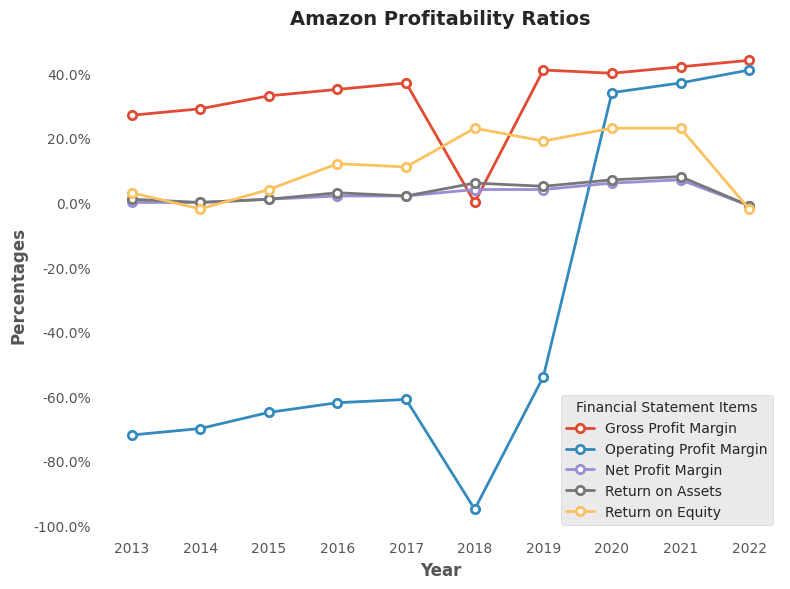

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Gross Profit Margin,44%,42%,40%,41%,0%,37%,35%,33%,29%,27%
Operating Profit Margin,41%,37%,34%,-54%,-95%,-61%,-62%,-65%,-70%,-72%
Net Profit Margin,-1%,7%,6%,4%,4%,2%,2%,1%,0%,0%
Return on Assets,-1%,8%,7%,5%,6%,2%,3%,1%,0%,1%
Return on Equity,-2%,23%,23%,19%,23%,11%,12%,4%,-2%,3%


In [ ]:
amazon_profitability_ratios_df = calculate_profitability_ratios(amazon_df_transposed,name='Amazon')
amazon_profitability_ratios_df

<ipython-input-365-c04a337f3dbb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


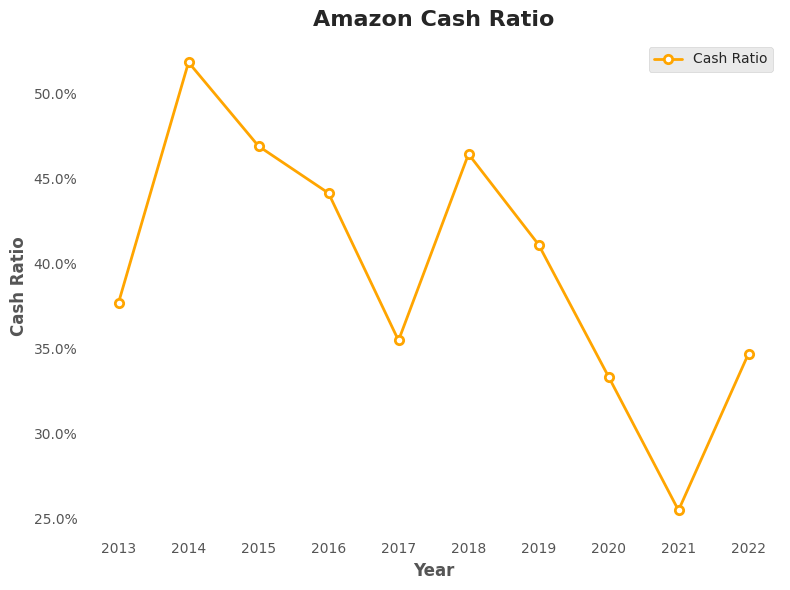

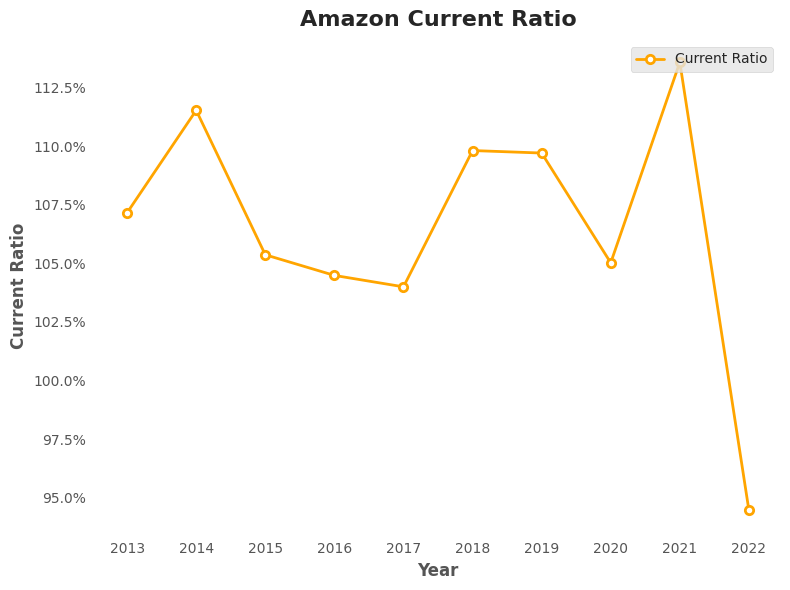

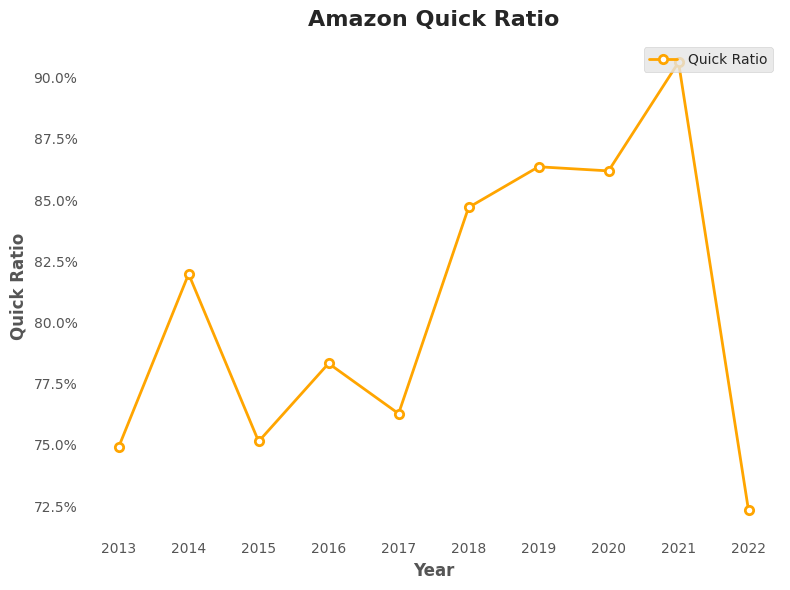

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


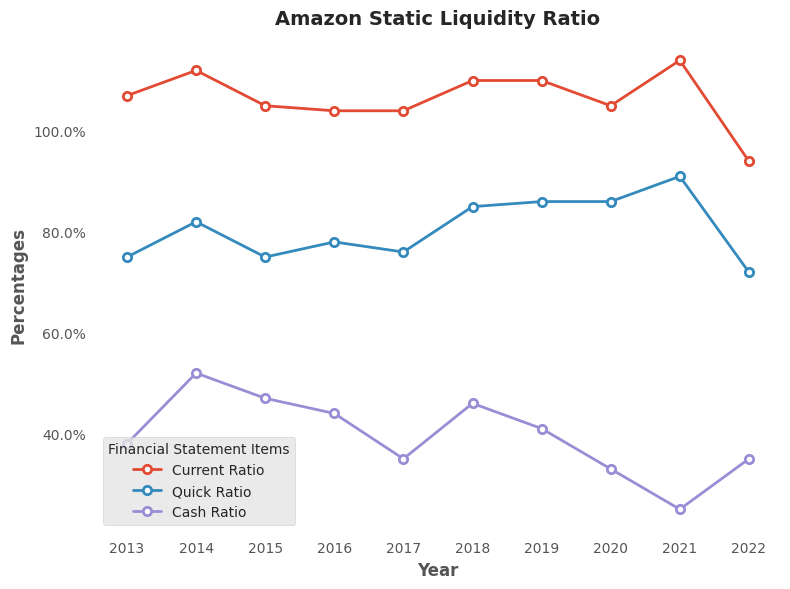

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentages/Year,,,,,,,,,,
Current Ratio,94%,114%,105%,110%,110%,104%,104%,105%,112%,107%
Quick Ratio,72%,91%,86%,86%,85%,76%,78%,75%,82%,75%
Cash Ratio,35%,25%,33%,41%,46%,35%,44%,47%,52%,38%


In [ ]:
amazon_static_liquidity_ratios_df = calculate_static_liquidity_ratios(amazon_df_transposed,name='Amazon')
amazon_static_liquidity_ratios_df

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


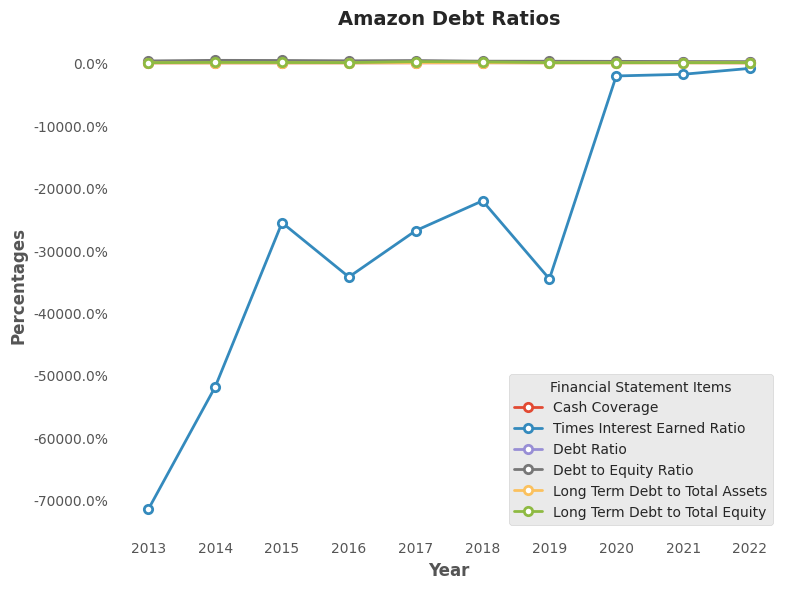

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Cash Coverage,-2%,23%,17%,13%,15%,5%,5%,2%,-1%,1%
Times Interest Earned Ratio,-883%,-1828%,-2097%,-34633%,-22113%,-26898%,-34323%,-25617%,-51936%,-71560%
Debt Ratio,61%,75%,71%,72%,73%,79%,77%,79%,80%,76%
Debt to Equity Ratio,204%,217%,244%,263%,273%,374%,332%,384%,407%,312%
Long Term Debt to Total Assets,15%,12%,10%,10%,42%,44%,9%,13%,15%,8%
Long Term Debt to Total Equity,49%,33%,34%,38%,157%,209%,40%,61%,77%,33%


In [ ]:
amazon_debt_ratios_df = calculate_debt_ratios(amazon_df_transposed,name='Amazon')
amazon_debt_ratios_df

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


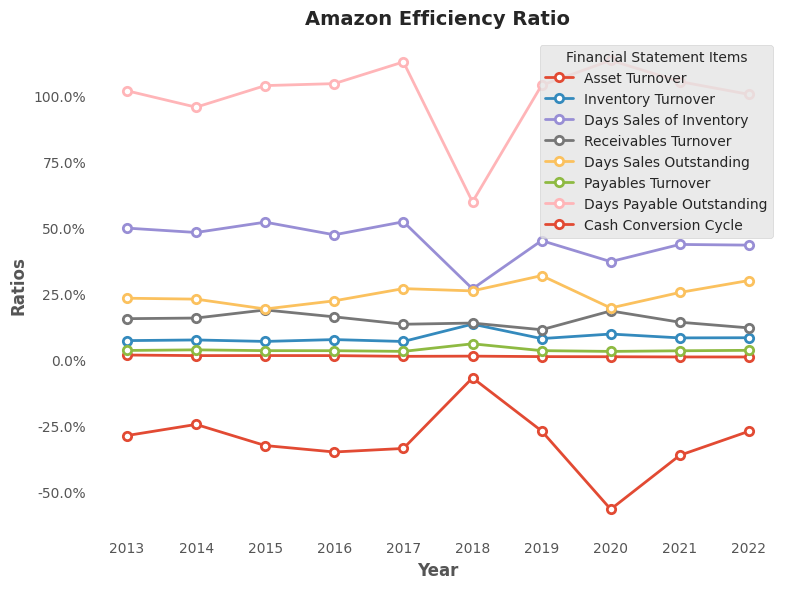

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Ratio/Year,,,,,,,,,,
Asset Turnover,1.11,1.12,1.20,1.25,1.43,1.35,1.63,1.65,1.63,1.85
Inventory Turnover,8.40,8.34,9.80,8.08,13.56,6.98,7.70,7.00,7.56,7.31
Days Sales of Inventory,43.48,43.74,37.23,45.20,26.92,52.33,47.39,52.18,48.27,49.93
Receivables Turnover,12.13,14.28,18.55,11.43,13.96,13.51,16.31,18.93,15.86,15.62
Days Sales Outstanding,30.08,25.55,19.68,31.93,26.14,27.01,22.38,19.29,23.02,23.37
Payables Turnover,3.63,3.46,3.22,3.51,6.10,3.23,3.49,3.51,3.81,3.58
Days Payable Outstanding,100.59,105.43,113.48,104.04,59.86,112.88,104.66,103.91,95.73,101.95
Cash Conversion Cycle,-27.03,-36.13,-56.58,-26.91,-6.80,-33.54,-34.88,-32.44,-24.44,-28.65


In [ ]:
amazon_efficiency_ratios_df = calculate_efficiency_ratios(amazon_df_transposed,name='Amazon')
amazon_efficiency_ratios_df

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


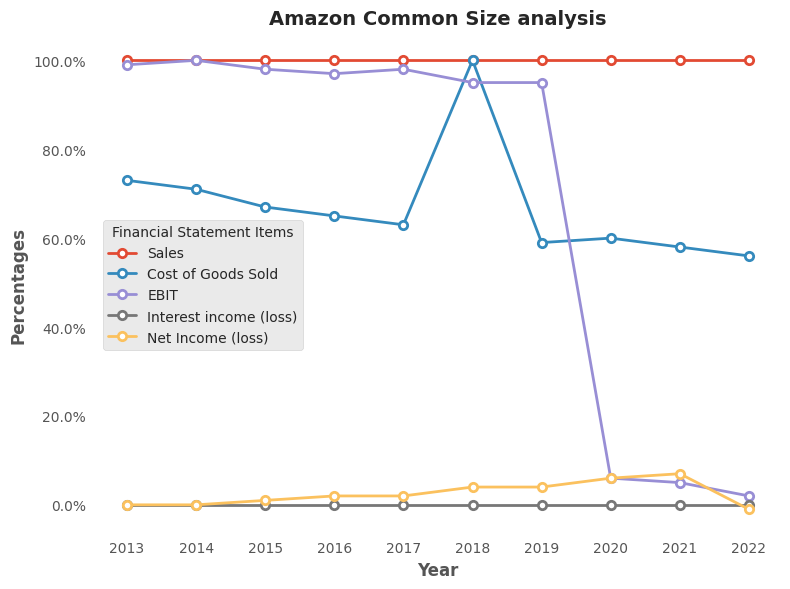

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Sales,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
Cost of Goods Sold,56%,58%,60%,59%,100%,63%,65%,67%,71%,73%
EBIT,2%,5%,6%,95%,95%,98%,97%,98%,100%,99%
Interest income (loss),0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
Net Income (loss),-1%,7%,6%,4%,4%,2%,2%,1%,0%,0%


In [ ]:
amazon_common_size_df = calculate_common_size(amazon_df_transposed,name='Amazon')
amazon_common_size_df

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


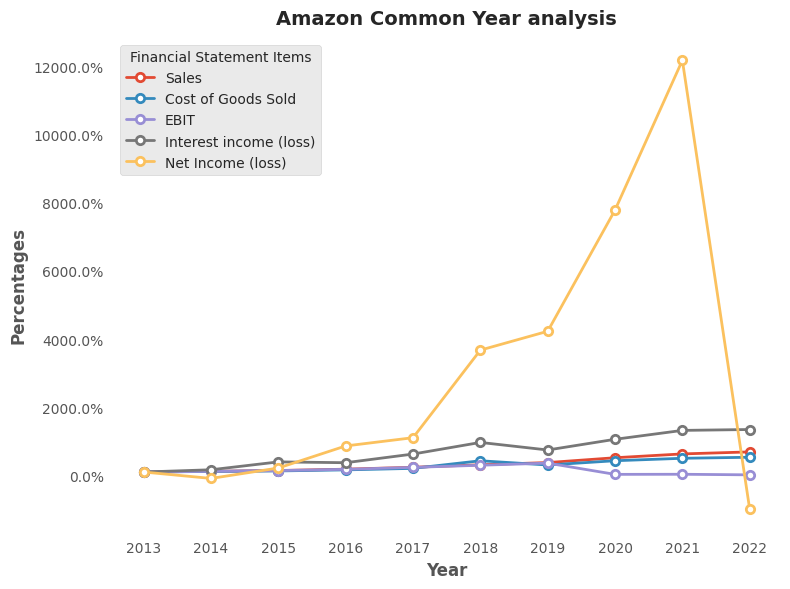

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Sales,690%,631%,519%,377%,313%,239%,183%,144%,120%,100%
Cost of Goods Sold,533%,503%,431%,306%,430%,207%,163%,132%,116%,100%
EBIT,17%,34%,31%,361%,299%,236%,179%,142%,120%,100%
Interest income (loss),1347%,1321%,1060%,746%,968%,627%,373%,397%,166%,100%
Net Income (loss),-993%,12177%,7785%,4229%,3676%,1107%,865%,218%,-88%,100%


In [ ]:
amazon_common_year_df = calculate_common_year(amazon_df_transposed,name='Amazon')
amazon_common_year_df

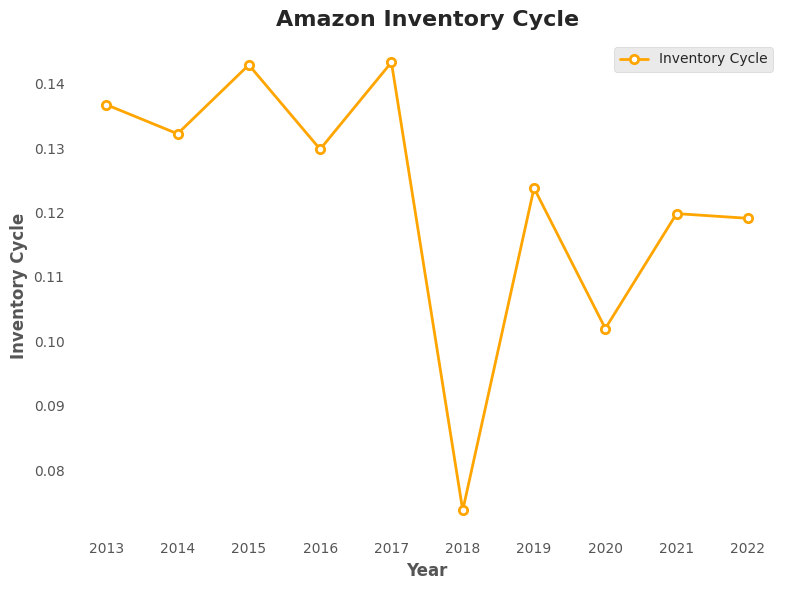

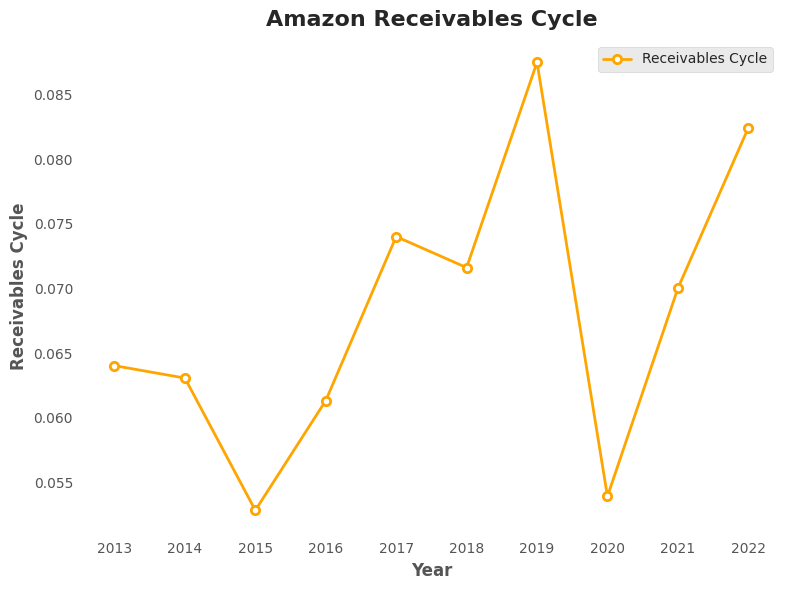

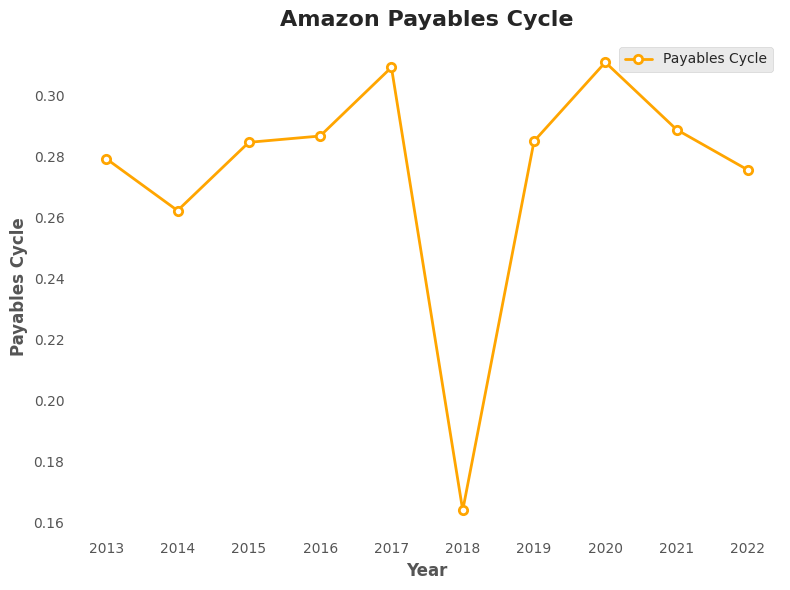

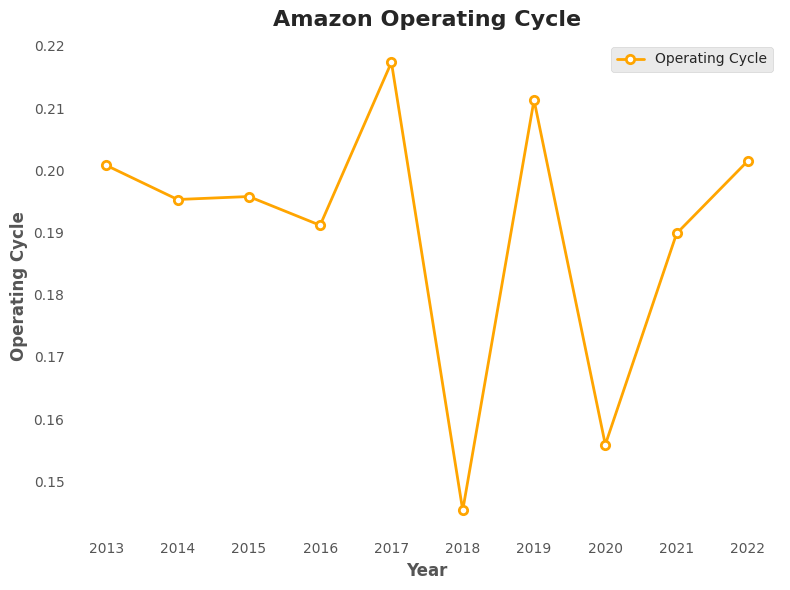

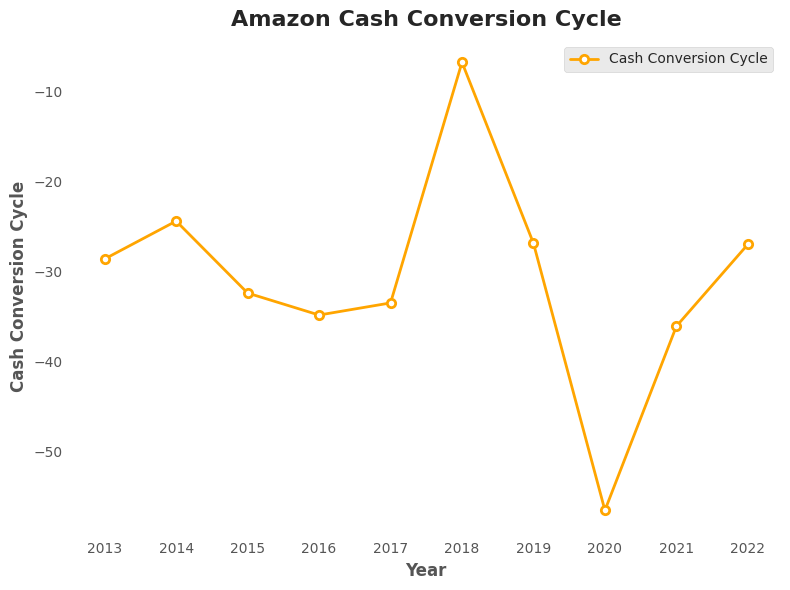

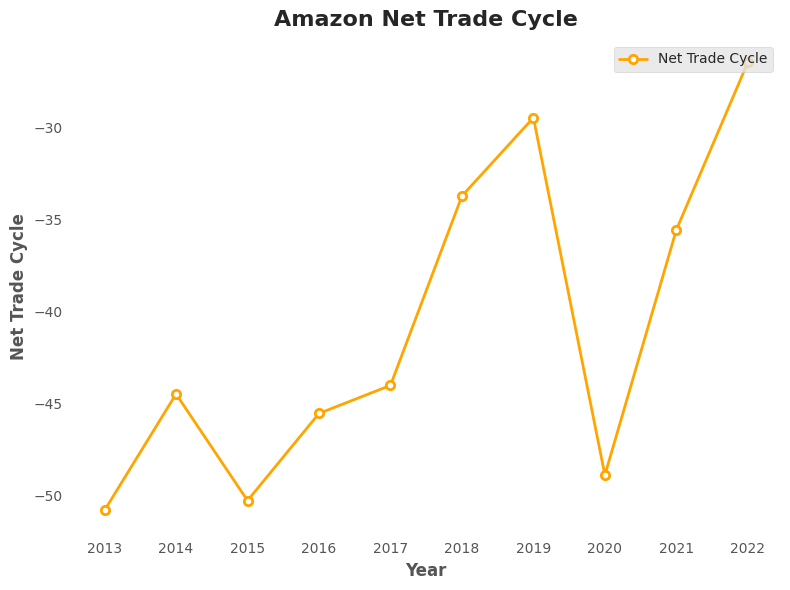

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


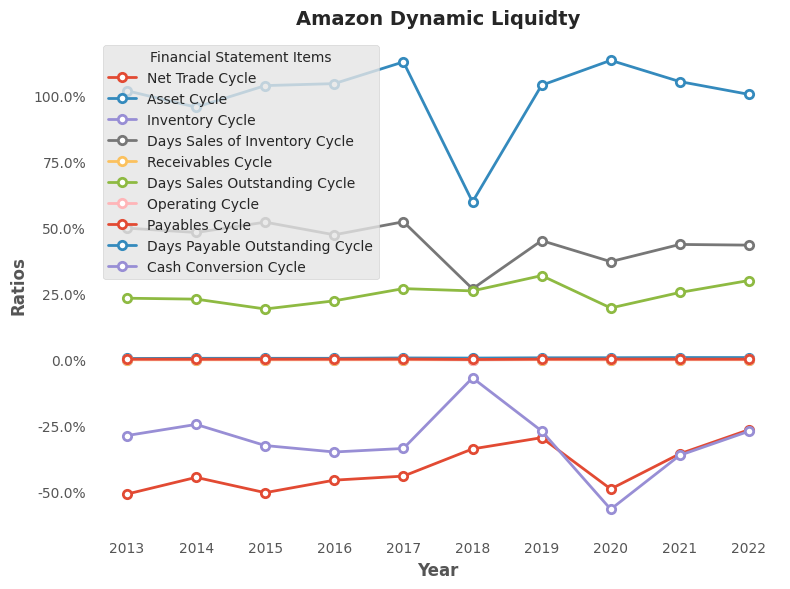

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Ratio/Year,,,,,,,,,,
Net Trade Cycle,-26.45,-35.56,-48.90,-29.46,-33.72,-44.02,-45.55,-50.29,-44.49,-50.82
Asset Cycle,0.90,0.90,0.83,0.80,0.70,0.74,0.61,0.61,0.61,0.54
Inventory Cycle,0.12,0.12,0.10,0.12,0.07,0.14,0.13,0.14,0.13,0.14
Days Sales of Inventory Cycle,43.48,43.74,37.23,45.20,26.92,52.33,47.39,52.18,48.27,49.93
Receivables Cycle,0.08,0.07,0.05,0.09,0.07,0.07,0.06,0.05,0.06,0.06
Days Sales Outstanding Cycle,30.08,25.55,19.68,31.93,26.14,27.01,22.38,19.29,23.02,23.37
Operating Cycle,0.20,0.19,0.16,0.21,0.15,0.22,0.19,0.20,0.20,0.20
Payables Cycle,0.28,0.29,0.31,0.29,0.16,0.31,0.29,0.28,0.26,0.28
Days Payable Outstanding Cycle,100.59,105.43,113.48,104.04,59.86,112.88,104.66,103.91,95.73,101.95


In [ ]:
amazon_dynamic_liquiduty_df = calculate_dynamic_liquiduty(amazon_df_transposed,name='Amazon')
amazon_dynamic_liquiduty_df

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


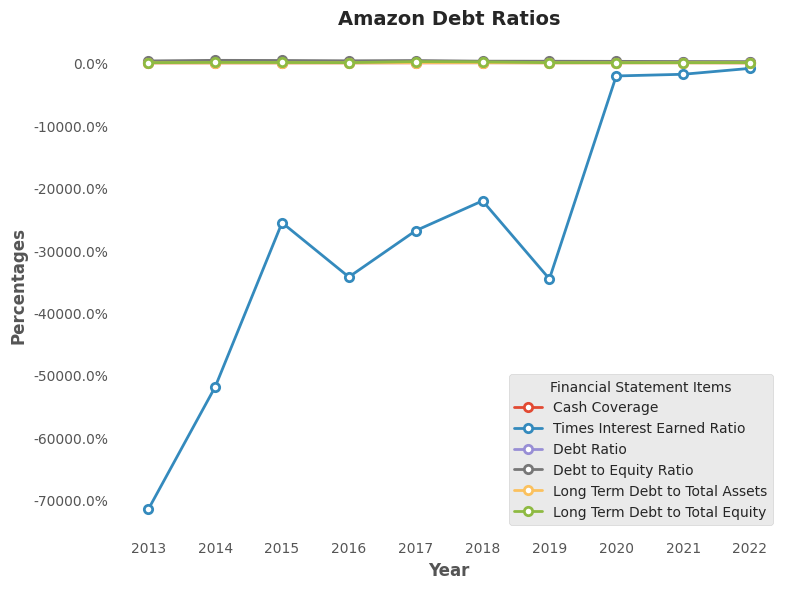

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Cash Coverage,-2%,23%,17%,13%,15%,5%,5%,2%,-1%,1%
Times Interest Earned Ratio,-883%,-1828%,-2097%,-34633%,-22113%,-26898%,-34323%,-25617%,-51936%,-71560%
Debt Ratio,61%,75%,71%,72%,73%,79%,77%,79%,80%,76%
Debt to Equity Ratio,204%,217%,244%,263%,273%,374%,332%,384%,407%,312%
Long Term Debt to Total Assets,15%,12%,10%,10%,42%,44%,9%,13%,15%,8%
Long Term Debt to Total Equity,49%,33%,34%,38%,157%,209%,40%,61%,77%,33%


In [ ]:
amazon_debt_ratio_df = calculate_debt_ratios(amazon_df_transposed,name='Amazon')
amazon_debt_ratio_df

<ipython-input-365-c04a337f3dbb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


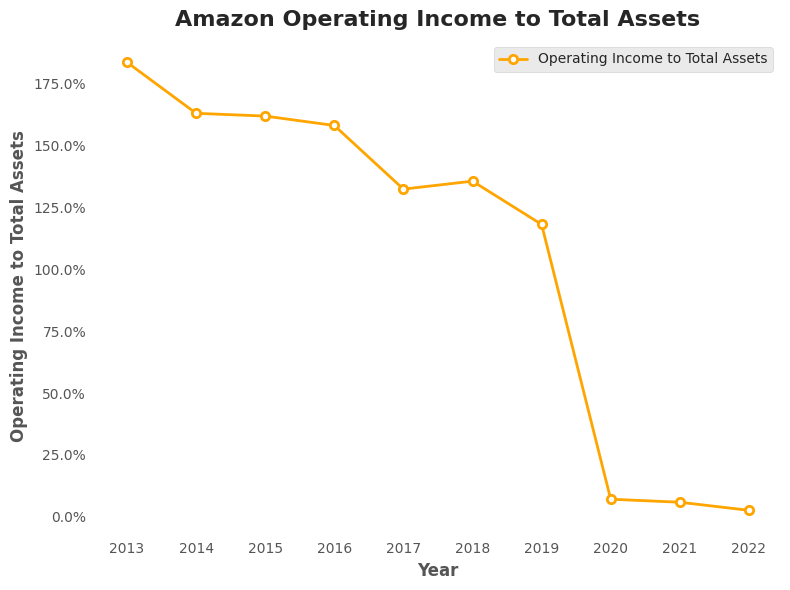

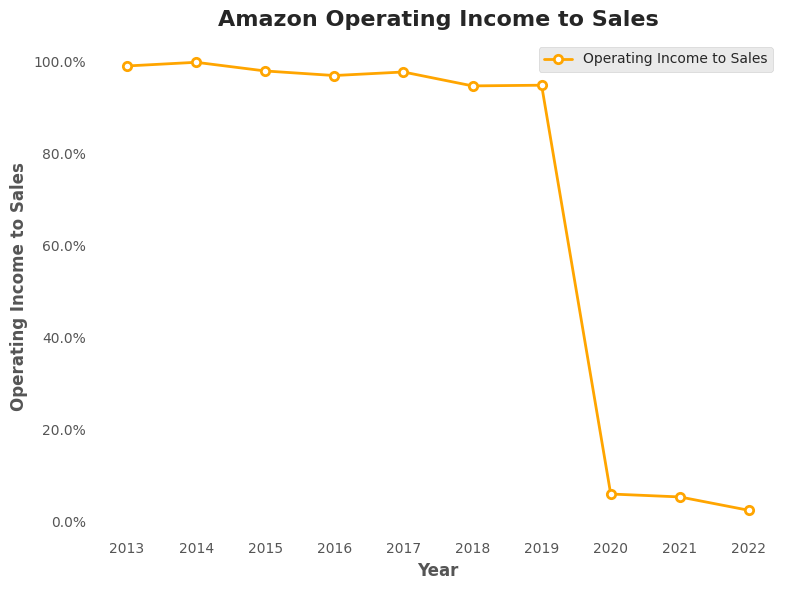

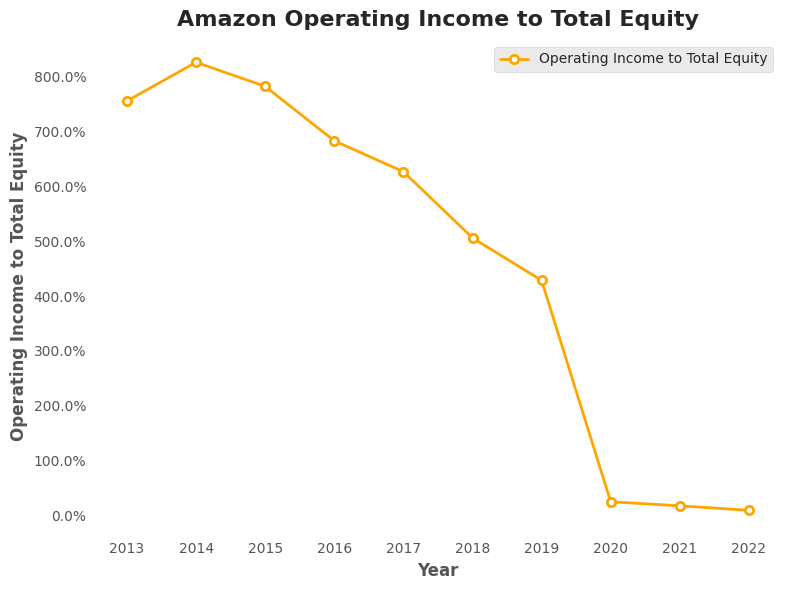

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


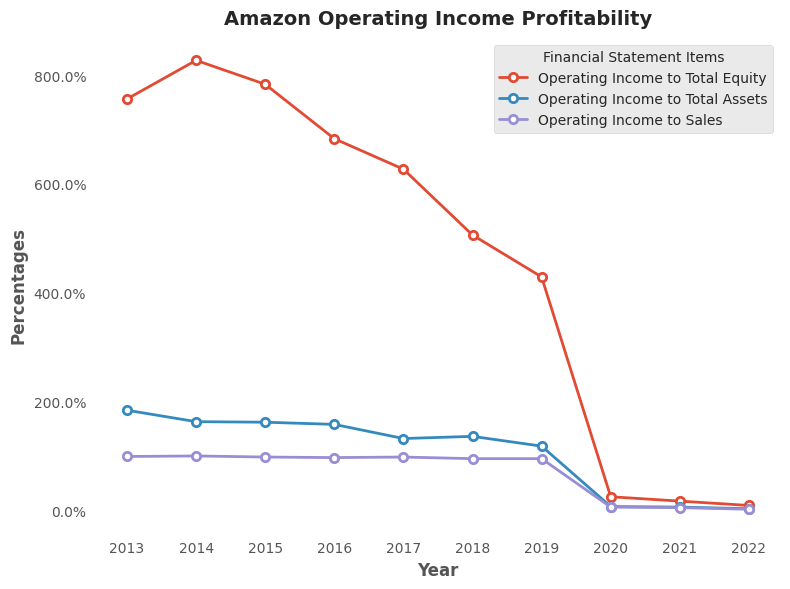

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Operating Income to Total Equity,9%,17%,25%,429%,506%,627%,683%,783%,827%,756%
Operating Income to Total Assets,3%,6%,7%,118%,136%,132%,158%,162%,163%,184%
Operating Income to Sales,2%,5%,6%,95%,95%,98%,97%,98%,100%,99%


In [ ]:
amazon_operating_income_df = calculate_operating_income_profitability(amazon_df_transposed,name='Amazon')
amazon_operating_income_df

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


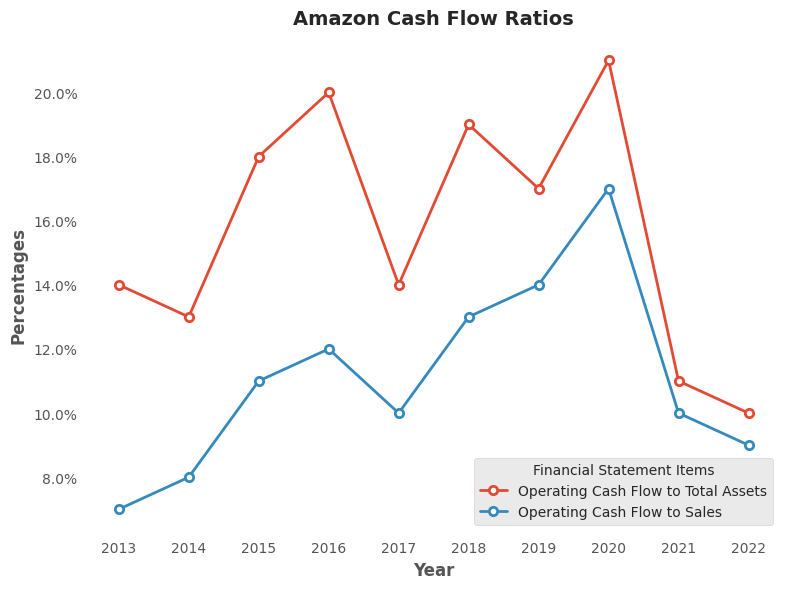

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Operating Cash Flow to Total Assets,10%,11%,21%,17%,19%,14%,20%,18%,13%,14%
Operating Cash Flow to Sales,9%,10%,17%,14%,13%,10%,12%,11%,8%,7%


In [ ]:
amazon_operating_cashflow_df = calculate_operating_cashflow(amazon_df_transposed,name='Amazon')
amazon_operating_cashflow_df

## Walmart

In [ ]:
name='Walmart'
walmart_df = pd.read_excel(FINANCE_DIR+f"{name}/{name}-financial-statement.ods",engine = 'odf')

In [ ]:
print(walmart_df.T.columns)
walmart_df

RangeIndex(start=0, stop=16, step=1)


,Item/Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,Current Assets,81070,90067,61806,61897,59664,57689,60239,63278,61185,59940
1,Current Liabilities,87379,92645,77790,77477,78521,66928,64619,65253,69345,71818
2,Inventories,56511,44949,44435,44269,43783,43046,44469,45141,44858,43803
3,Cash,14760,17741,9465,7722,6756,6867,8705,9135,7281,7781
4,Receivables,8280,6516,6284,6283,5614,5835,5624,6778,6677,6768
5,Total Assets,244860,252496,236495,219295,204522,198825,199581,203490,204751,203105
6,Payables,55261,49141,46973,47060,46092,41433,38487,38410,37415,38080
7,Long Term Debt,2803,3115,43714,43714,3738,2256,2745,4791,41771,38394
8,Total Liabilities,152969,164965,154943,139661,123700,123700,115970,117553,123412,121367
9,Total Equity,91891,87531,81552,79634,80822,80535,83611,85937,81339,81738


In [ ]:
walmart_df_transposed = walmart_df.set_index("Item/Year").T
print(walmart_df_transposed.columns)
walmart_df_transposed

Index(['Current Assets', 'Current Liabilities', 'Inventories', 'Cash',
       'Receivables', 'Total Assets', 'Payables', 'Long Term Debt',
       'Total Liabilities', 'Total Equity', 'Sales', 'Cost of Goods Sold',
       'EBIT', 'Interest income (loss)', 'Net Income (loss)',
       'Operating Cash Flow'],
      dtype='object', name='Item/Year')


Item/Year,Current Assets,Current Liabilities,Inventories,Cash,Receivables,Total Assets,Payables,Long Term Debt,Total Liabilities,Total Equity,Sales,Cost of Goods Sold,EBIT,Interest income (loss),Net Income (loss),Operating Cash Flow
2022,81070,87379,56511,14760,8280,244860,55261,2803,152969,91891,572754,429000,24181,1836,13940,24181
2021,90067,92645,44949,17741,6516,252496,49141,3115,164965,87531,559151,420315,36074,2194,13706,36074
2020,61806,77790,44435,9465,6284,236495,46973,43714,154943,81552,523964,394605,25255,2410,15201,25255
2019,61897,77477,44269,7722,6283,219295,47060,43714,139661,79634,514405,385301,21957,2129,7179,27753
2018,59664,78521,43783,6756,5614,204522,46092,3738,123700,80822,500343,373396,20437,2178,10523,28337
2017,57689,66928,43046,6867,5835,198825,41433,2256,123700,80535,485873,361256,22764,2267,14293,31673
2016,60239,64619,44469,8705,5624,199581,38487,2745,115970,83611,482130,360984,24105,2467,15080,27552
2015,63278,65253,45141,9135,6778,203490,38410,4791,117553,85937,485651,365086,27147,2348,17099,28564
2014,61185,69345,44858,7281,6677,204751,37415,41771,123412,81339,476294,358069,26872,2216,16695,23257
2013,59940,71818,43803,7781,6768,203105,38080,38394,121367,81738,468651,352297,27725,2063,17756,25591


<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


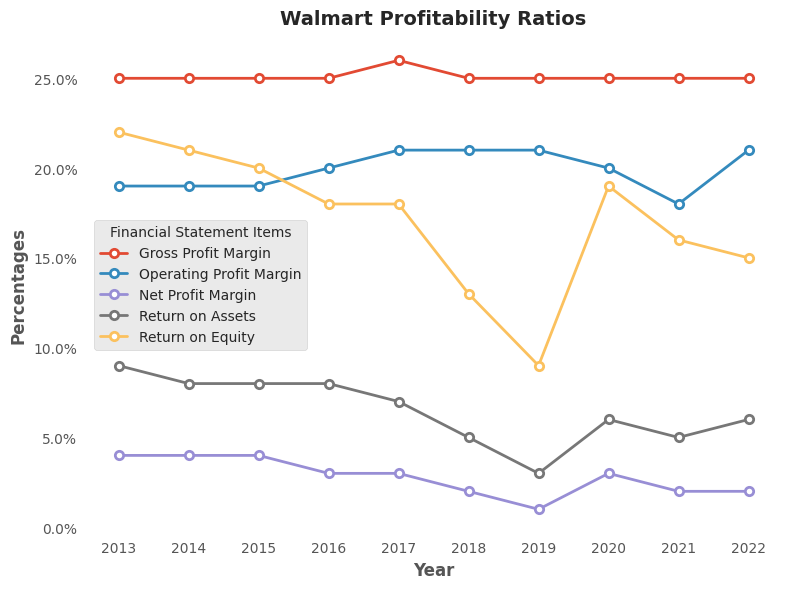

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Gross Profit Margin,25%,25%,25%,25%,25%,26%,25%,25%,25%,25%
Operating Profit Margin,21%,18%,20%,21%,21%,21%,20%,19%,19%,19%
Net Profit Margin,2%,2%,3%,1%,2%,3%,3%,4%,4%,4%
Return on Assets,6%,5%,6%,3%,5%,7%,8%,8%,8%,9%
Return on Equity,15%,16%,19%,9%,13%,18%,18%,20%,21%,22%


In [ ]:
 calculate_profitability_ratios(walmart_df_transposed,name=name)

<ipython-input-365-c04a337f3dbb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


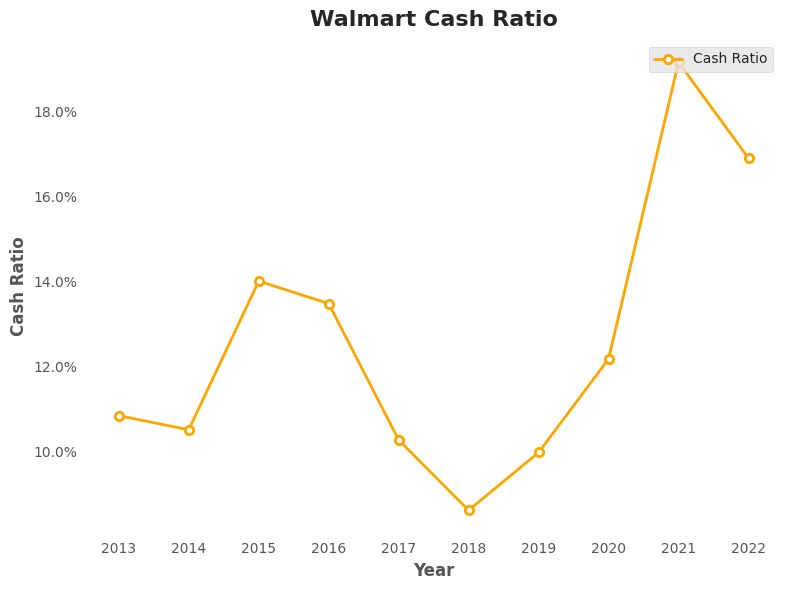

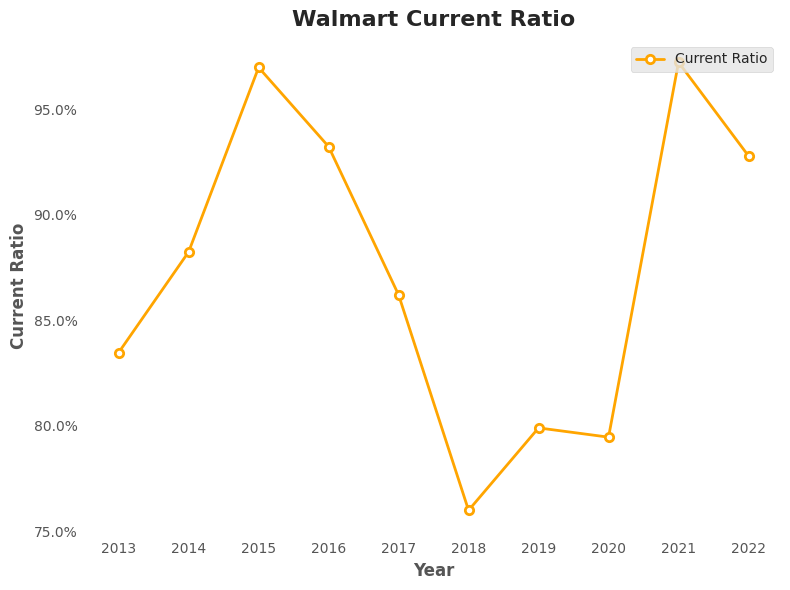

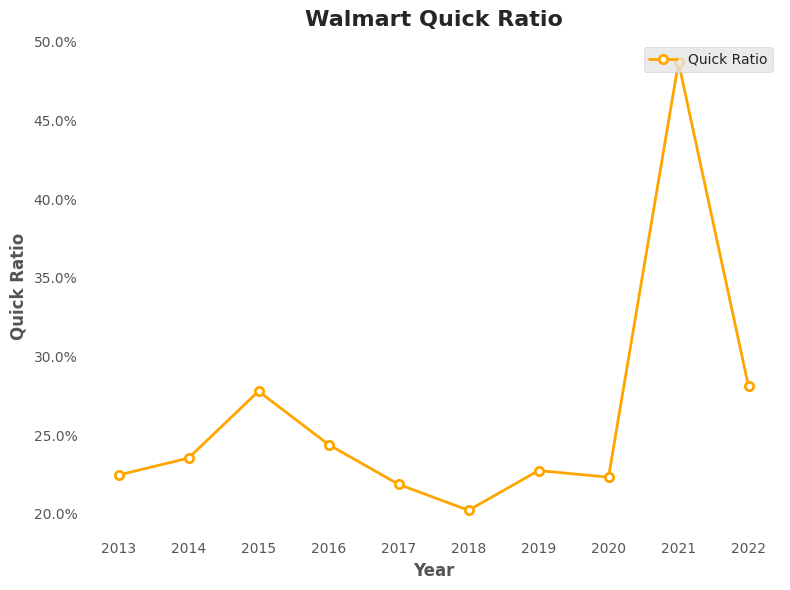

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


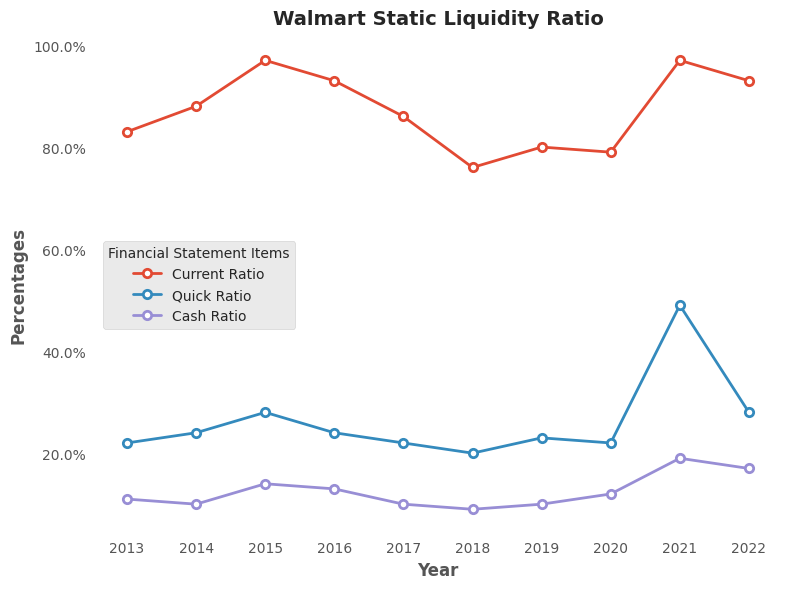

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentages/Year,,,,,,,,,,
Current Ratio,93%,97%,79%,80%,76%,86%,93%,97%,88%,83%
Quick Ratio,28%,49%,22%,23%,20%,22%,24%,28%,24%,22%
Cash Ratio,17%,19%,12%,10%,9%,10%,13%,14%,10%,11%


In [ ]:
 calculate_static_liquidity_ratios(walmart_df_transposed,name=name)


<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


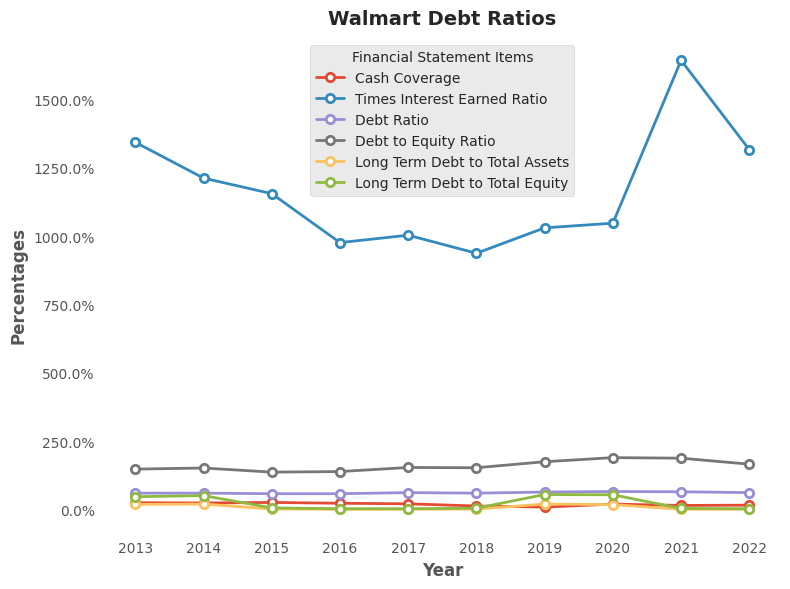

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Cash Coverage,16%,15%,20%,9%,13%,21%,23%,26%,24%,25%
Times Interest Earned Ratio,1317%,1644%,1048%,1031%,938%,1004%,977%,1156%,1213%,1344%
Debt Ratio,62%,65%,66%,64%,60%,62%,58%,58%,60%,60%
Debt to Equity Ratio,166%,188%,190%,175%,153%,154%,139%,137%,152%,148%
Long Term Debt to Total Assets,1%,1%,18%,20%,2%,1%,1%,2%,20%,19%
Long Term Debt to Total Equity,3%,4%,54%,55%,5%,3%,3%,6%,51%,47%


In [ ]:
calculate_debt_ratios(walmart_df_transposed,name=name)

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


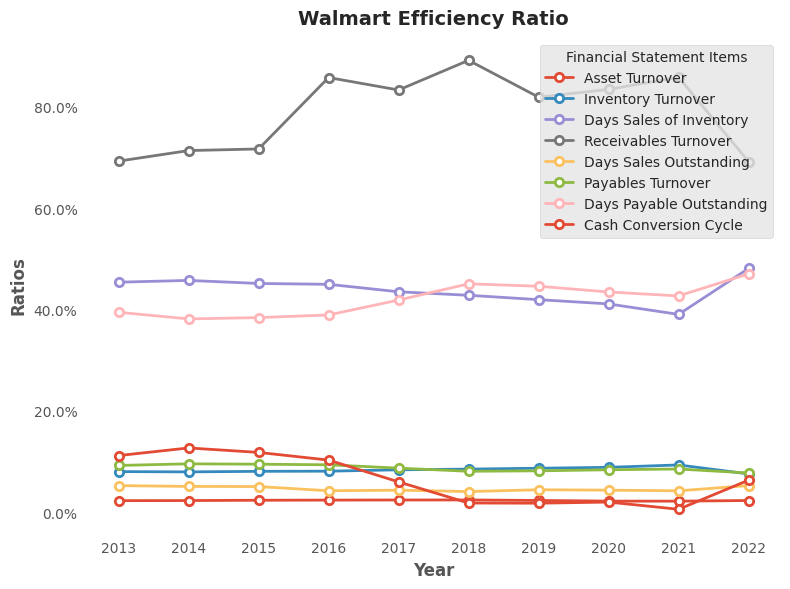

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Ratio/Year,,,,,,,,,,
Asset Turnover,2.34,2.21,2.22,2.35,2.45,2.44,2.42,2.39,2.33,2.31
Inventory Turnover,7.59,9.35,8.88,8.70,8.53,8.39,8.12,8.09,7.98,8.04
Days Sales of Inventory,48.08,39.03,41.10,41.94,42.80,43.49,44.96,45.13,45.73,45.38
Receivables Turnover,69.17,85.81,83.38,81.87,89.12,83.27,85.73,71.65,71.33,69.25
Days Sales Outstanding,5.28,4.25,4.38,4.46,4.10,4.38,4.26,5.09,5.12,5.27
Payables Turnover,7.76,8.55,8.40,8.19,8.10,8.72,9.38,9.50,9.57,9.25
Days Payable Outstanding,47.02,42.67,43.45,44.58,45.06,41.86,38.92,38.40,38.14,39.45
Cash Conversion Cycle,6.34,0.61,2.03,1.81,1.84,6.01,10.31,11.82,12.70,11.20


In [ ]:
calculate_efficiency_ratios(walmart_df_transposed,name=name)

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


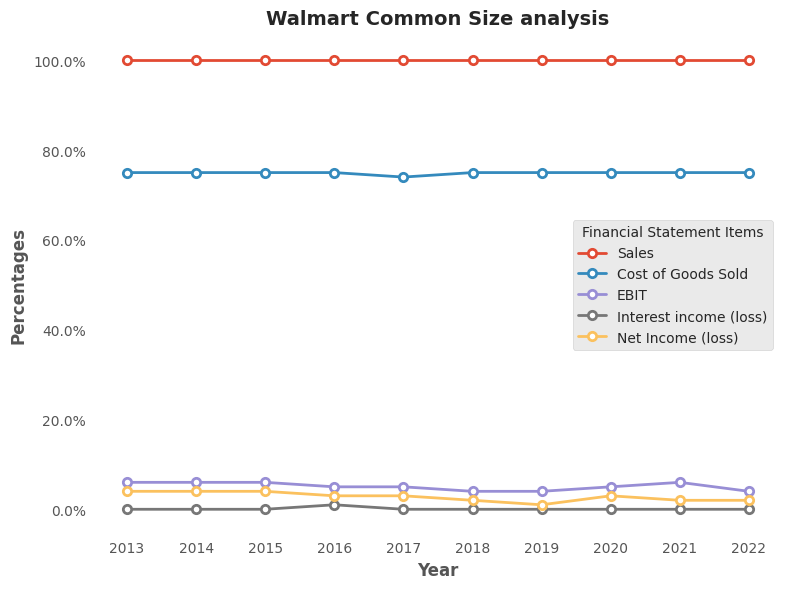

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Sales,100%,100%,100%,100%,100%,100%,100%,100%,100%,100%
Cost of Goods Sold,75%,75%,75%,75%,75%,74%,75%,75%,75%,75%
EBIT,4%,6%,5%,4%,4%,5%,5%,6%,6%,6%
Interest income (loss),0%,0%,0%,0%,0%,0%,1%,0%,0%,0%
Net Income (loss),2%,2%,3%,1%,2%,3%,3%,4%,4%,4%


In [ ]:
 calculate_common_size(walmart_df_transposed,name=name)


<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


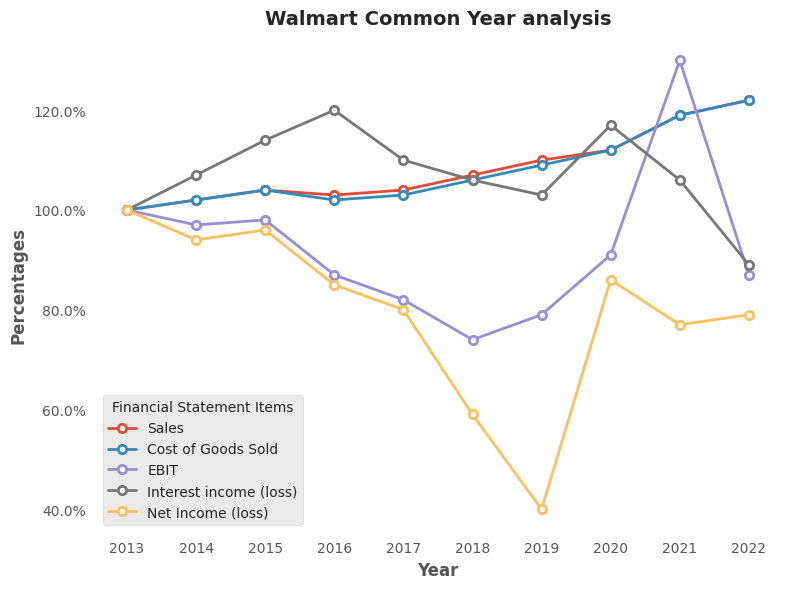

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Sales,122%,119%,112%,110%,107%,104%,103%,104%,102%,100%
Cost of Goods Sold,122%,119%,112%,109%,106%,103%,102%,104%,102%,100%
EBIT,87%,130%,91%,79%,74%,82%,87%,98%,97%,100%
Interest income (loss),89%,106%,117%,103%,106%,110%,120%,114%,107%,100%
Net Income (loss),79%,77%,86%,40%,59%,80%,85%,96%,94%,100%


In [ ]:
calculate_common_year(walmart_df_transposed,name=name)

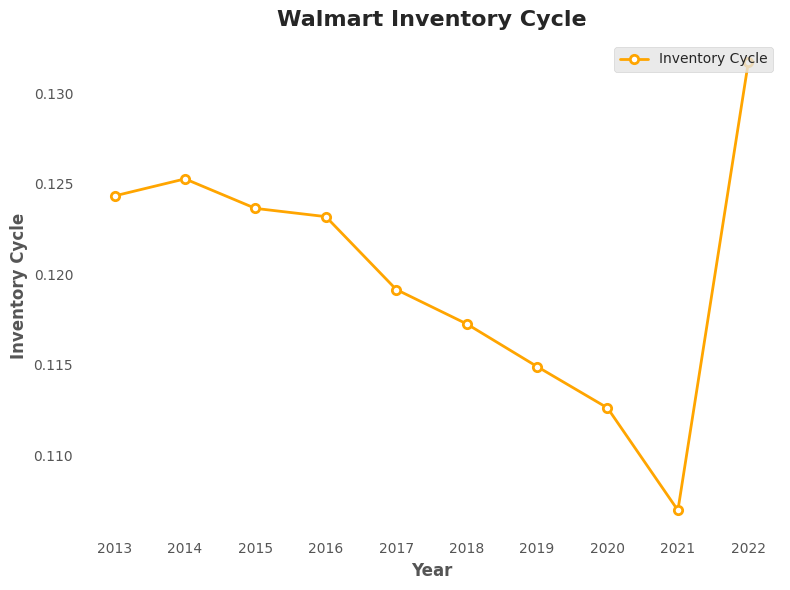

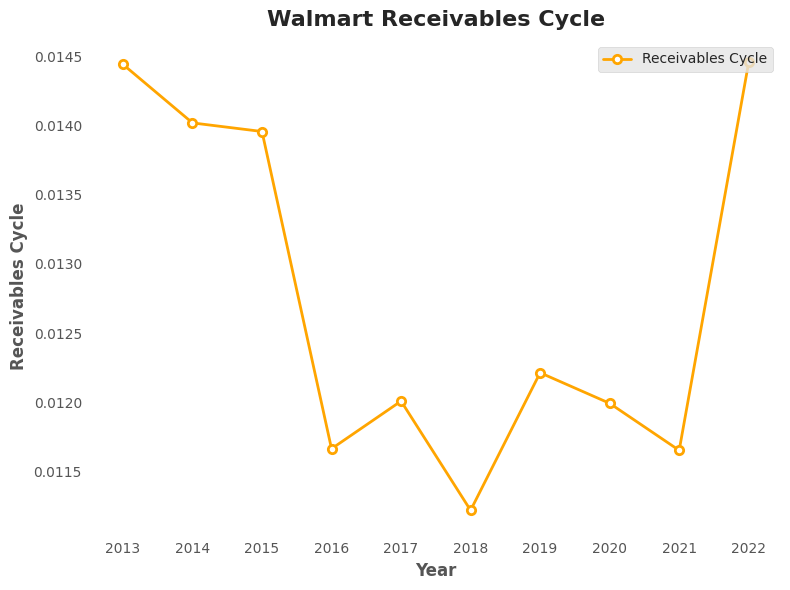

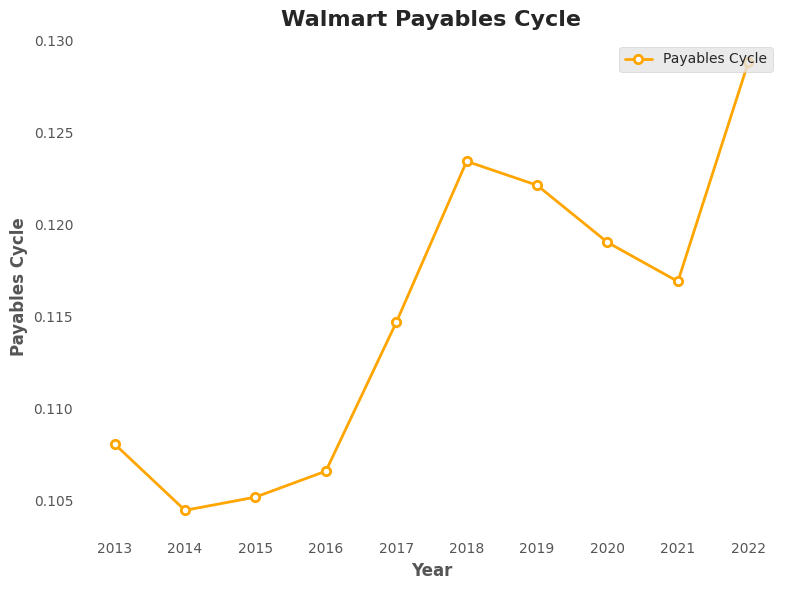

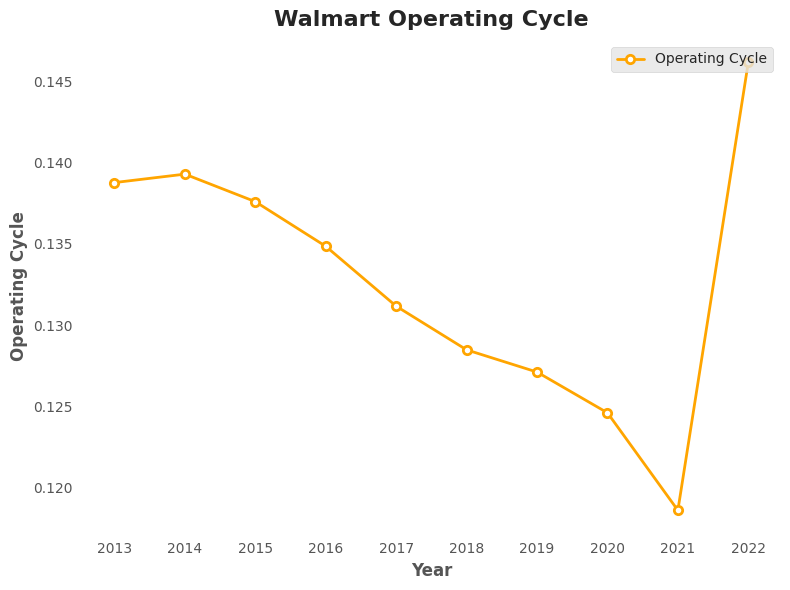

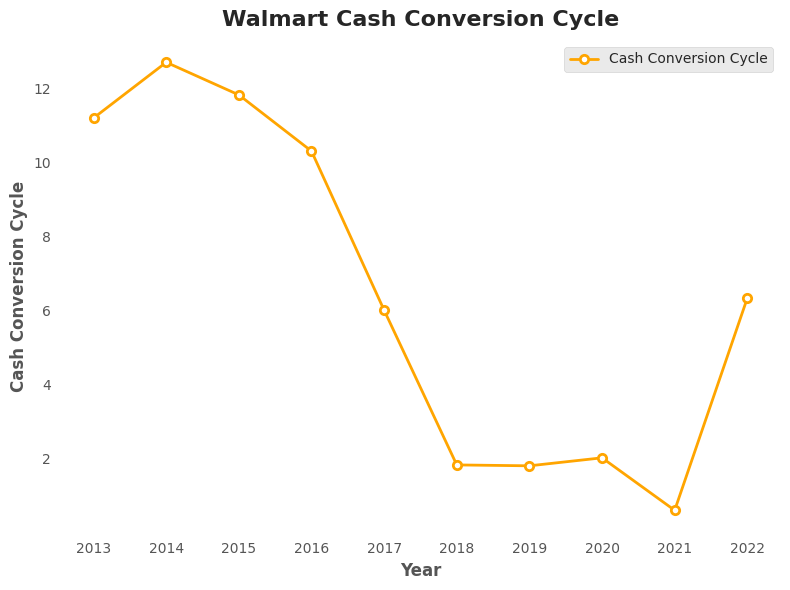

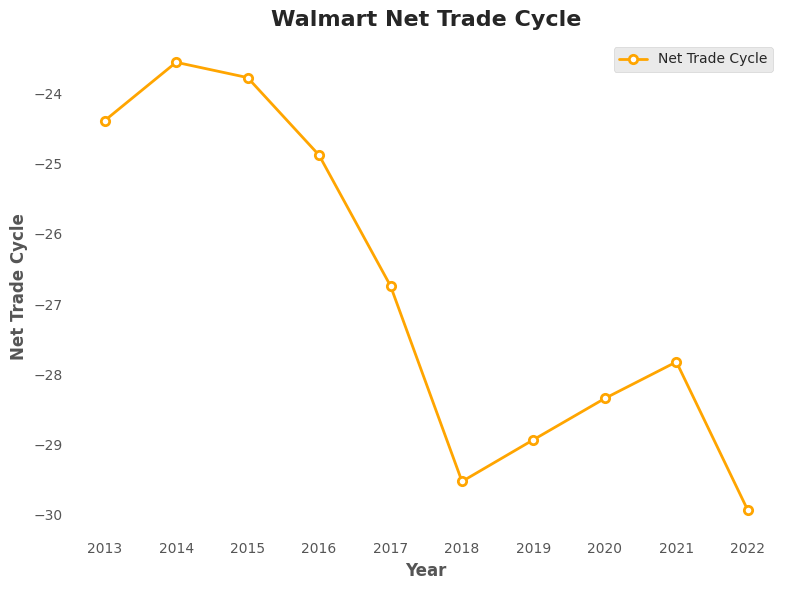

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


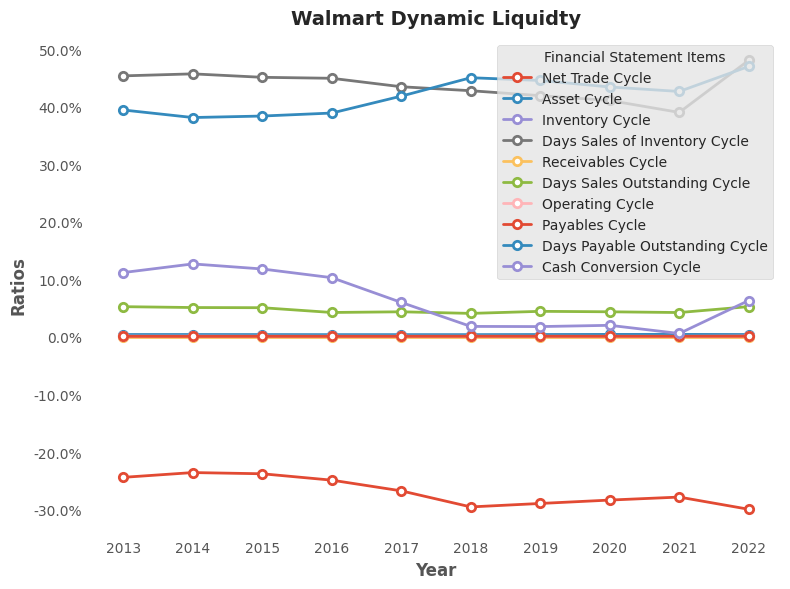

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Ratio/Year,,,,,,,,,,
Net Trade Cycle,-29.94,-27.82,-28.34,-28.93,-29.53,-26.74,-24.88,-23.77,-23.56,-24.39
Asset Cycle,0.43,0.45,0.45,0.43,0.41,0.41,0.41,0.42,0.43,0.43
Inventory Cycle,0.13,0.11,0.11,0.11,0.12,0.12,0.12,0.12,0.13,0.12
Days Sales of Inventory Cycle,48.08,39.03,41.10,41.94,42.80,43.49,44.96,45.13,45.73,45.38
Receivables Cycle,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Days Sales Outstanding Cycle,5.28,4.25,4.38,4.46,4.10,4.38,4.26,5.09,5.12,5.27
Operating Cycle,0.15,0.12,0.12,0.13,0.13,0.13,0.13,0.14,0.14,0.14
Payables Cycle,0.13,0.12,0.12,0.12,0.12,0.11,0.11,0.11,0.10,0.11
Days Payable Outstanding Cycle,47.02,42.67,43.45,44.58,45.06,41.86,38.92,38.40,38.14,39.45


In [ ]:
calculate_dynamic_liquiduty(walmart_df_transposed,name=name)


<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


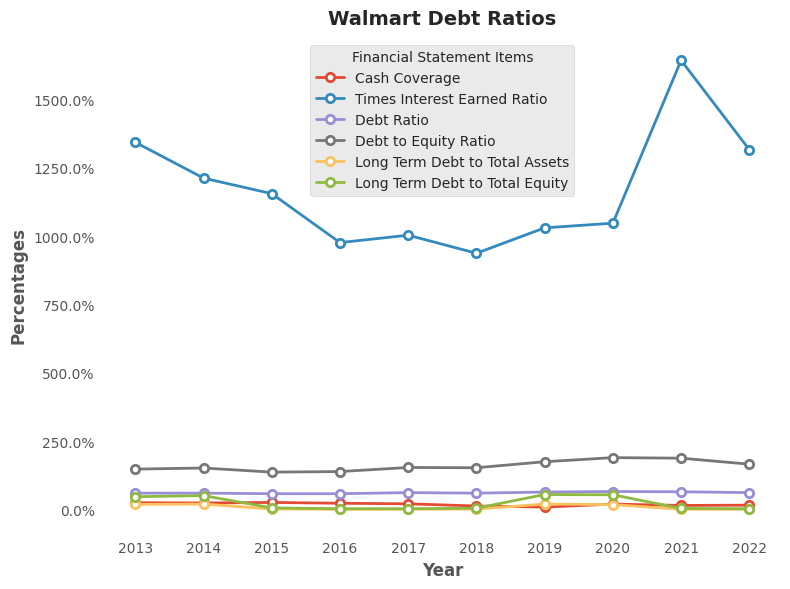

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Cash Coverage,16%,15%,20%,9%,13%,21%,23%,26%,24%,25%
Times Interest Earned Ratio,1317%,1644%,1048%,1031%,938%,1004%,977%,1156%,1213%,1344%
Debt Ratio,62%,65%,66%,64%,60%,62%,58%,58%,60%,60%
Debt to Equity Ratio,166%,188%,190%,175%,153%,154%,139%,137%,152%,148%
Long Term Debt to Total Assets,1%,1%,18%,20%,2%,1%,1%,2%,20%,19%
Long Term Debt to Total Equity,3%,4%,54%,55%,5%,3%,3%,6%,51%,47%


In [ ]:
calculate_debt_ratios(walmart_df_transposed,name=name)


<ipython-input-365-c04a337f3dbb>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


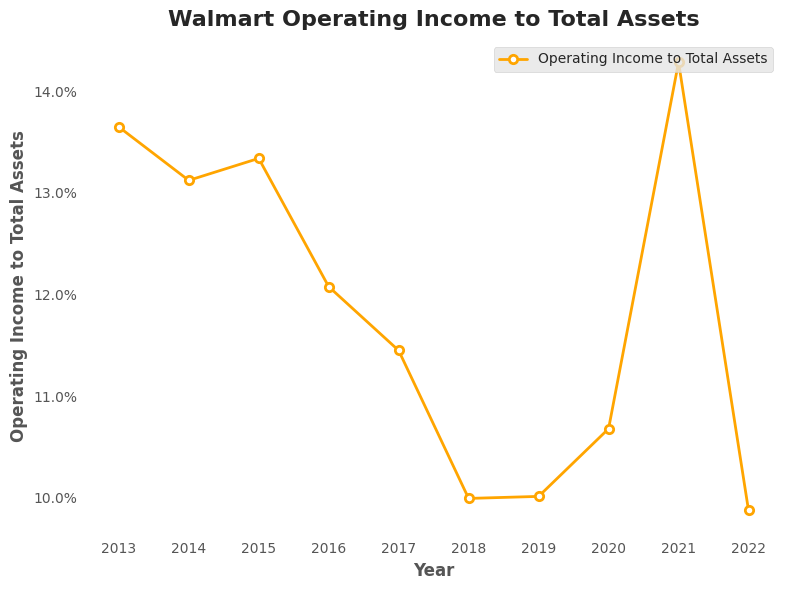

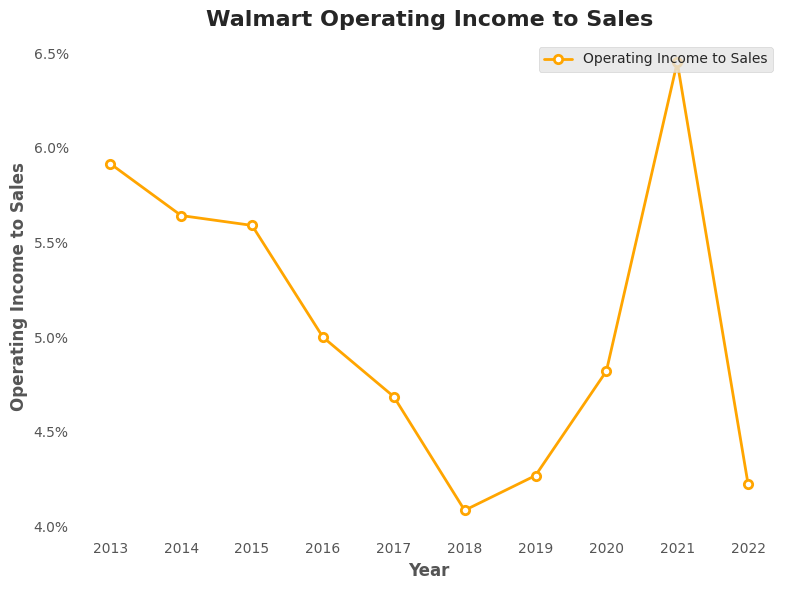

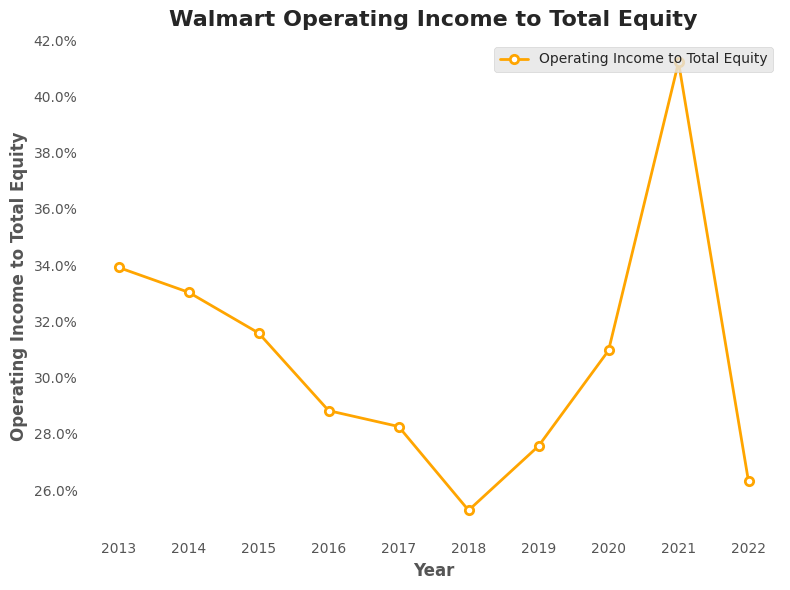

<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


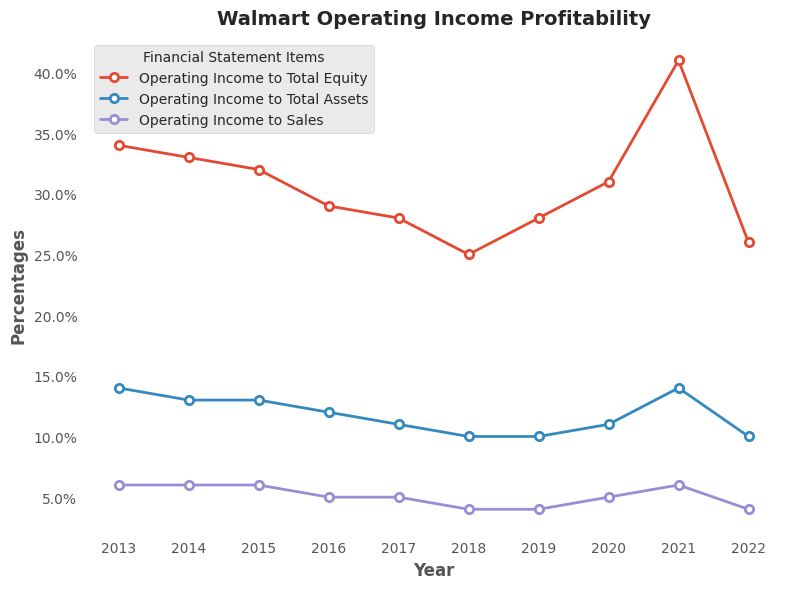

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Operating Income to Total Equity,26%,41%,31%,28%,25%,28%,29%,32%,33%,34%
Operating Income to Total Assets,10%,14%,11%,10%,10%,11%,12%,13%,13%,14%
Operating Income to Sales,4%,6%,5%,4%,4%,5%,5%,6%,6%,6%


In [ ]:
calculate_operating_income_profitability(walmart_df_transposed,name=name)


<ipython-input-366-e67acd8e1c8e>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{y}%' for y in plt.gca().get_yticks()])


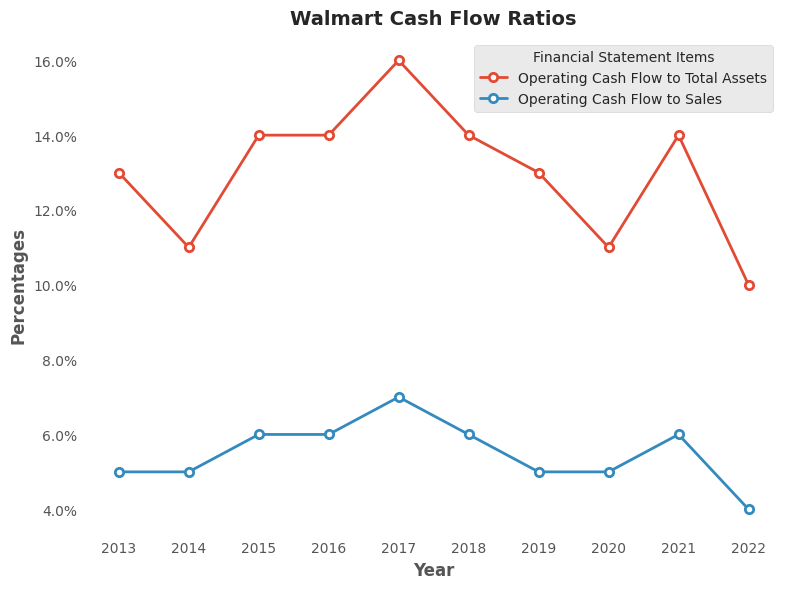

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Percentage/Year,,,,,,,,,,
Operating Cash Flow to Total Assets,10%,14%,11%,13%,14%,16%,14%,14%,11%,13%
Operating Cash Flow to Sales,4%,6%,5%,5%,6%,7%,6%,6%,5%,5%


In [ ]:
calculate_operating_cashflow(walmart_df_transposed,name=name)
